In [1]:

import os,sys,glob
# Move two levels up work from project level, not location of analysis file
os.chdir('../..')
print(os.getcwd())
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
import pandas as pd
import Functions.globalFunctions.ExtracellularField as EcF
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
from typing import Literal
from scipy import integrate
import ipympl
import time
import seaborn as sns
from scipy import stats
from scipy import optimize
#import warnings
from Analyses.SDC_singlePulse_fixedIntensity.tools import *
from Analyses.SDC_singlePulse_fixedIntensity import loader

import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
#warnings.filterwarnings('error',category=UserWarning)

%matplotlib inline
recollect = False


d:\Users\rschoete\Documents\Optogenetics\OptogeneticExcitability\Code


In [2]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    if not cbar_kw is False:
        cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
        cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

def heatmap2(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="",row_colors = None, column_colors = None, **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)
    if row_colors is not None:
        ax_row_cols = ax.inset_axes([-0.01, 0, 0.01, 1])
        ax_row_cols.spines[:].set_visible(False)
    if column_colors is not None:
        ax_column_cols = ax.inset_axes([0,1, 1, 0.01,])
        ax_column_cols.spines[:].set_visible(False)



    # Create colorbar
    if not cbar_kw is False:
        cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
        cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    if column_colors is None:
        ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
        # Let the horizontal axes labeling appear on top.
        ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    else:
        ax_column_cols.imshow(column_colors,aspect='auto')
        ax_column_cols.set_xticks(np.arange(data.shape[0]), labels=col_labels)
        ax_column_cols.set_xticks(np.arange(data.shape[0]+1)-.5, minor=True)
        ax_column_cols.set_yticks([])
        ax_column_cols.tick_params(which="minor", bottom=False, left=False)
        ax.set_xticks([])
        # Let the horizontal axes labeling appear on top.
        ax_column_cols.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
        # Rotate the tick labels and set their alignment.
        plt.setp(ax_column_cols.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    if row_colors is None:
        ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)
        ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    else:
        ax_row_cols.imshow(row_colors,aspect='auto')
        ax_row_cols.set_yticks(np.arange(data.shape[0]), labels=row_labels)
        ax_row_cols.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
        ax_row_cols.set_xticks([])
        ax_row_cols.tick_params(which="minor", bottom=False, left=False)

        ax.set_yticks([])
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.grid(which="minor", color="w", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

def linearReg(dataframe,features,axs,filteronthreshold,xdata_str='Gmax_log10',plot_flag = True,scatterplot=True):
    ress = []
    tinv = lambda p, df: abs(stats.t.ppf(p/2, df))
    for feat,ax in zip(features,axs):
        xdata = np.array(dataframe[xdata_str])
        ydata = np.array(dataframe[feat])
        idx = ~np.isnan(ydata)
        if filteronthreshold:
            idx = ~np.isnan(np.array(dataframe['amp_log10'])) & idx
        xdata = xdata[idx]
        xvals = np.unique(xdata)
        ydata = ydata[idx]
        res = stats.linregress(xdata, ydata)
        ts = tinv(0.05, len(xdata)-2)
        print(f"\n{feat}\nRsquared: {res.rvalue**2}\nslope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")
        print(f"intercept (95%): {res.intercept:.6f} +/- {ts*res.intercept_stderr:.6f}")


        # calculate MSE
        yestim = xdata*res.slope+res.intercept
        MSE = np.mean((ydata-yestim)**2)

        # calculate own estimate 95% confidence interval
        mymatrix = np.zeros((4,len(xvals)))
        i= -1
        for x in [-1,1]:
            for y in [-1,1]:
                i+=1
                mymatrix[i,:] = xvals*(res.slope+x*ts*res.stderr)+res.intercept+y*ts*res.intercept_stderr
        minslope = np.min(mymatrix,axis=0)
        maxslope = np.max(mymatrix,axis=0)

        #plot

        intm_df = dataframe[idx]
        if plot_flag:
            if scatterplot:
                sns.scatterplot(intm_df,x = xdata_str,y=feat,ax=ax,hue='opsinlocations',style='dur')
                sns.regplot(intm_df,x = xdata_str, y=feat,ax=ax,marker='')
            else:
                sns.regplot(intm_df,x = xdata_str, y=feat,ax=ax)
            ax.plot(xvals,xvals*res.slope+res.intercept)
            ax.plot(xvals,minslope,color='k')
            ax.plot(xvals,maxslope,color='k')
            ax.set_title(feat)
        res = res._asdict()
        res['MSE'] = MSE
        res['Rsquared'] = res['rvalue']**2
        ress.append(res)
    return ress

# loading raw data
stored in master_df

unique_values_columns_master contains all unique values for each column

In [3]:
#Load data
filepath = './Results/SDC/SDC_constI'
drop_columns = ['opsinmech','distribution','distribution_method','theta_0','psi_0','phi_0','seed','celsius','dt','field']

# list parameters of interest
cell_init_options = ['phi_0', 'theta_0', 'psi_0', 'neurontemplate']
settings_options = ['seed', 'celsius', 'dt']
opsin_options = ['Gmax', 'distribution', 'opsinmech',
                    'distribution_method', 'opsinlocations']
field_options = ['field', 'nPulse']
result = ['amp', 'sR', 'ichr2', 'gchr2', 'dur']
all_columns = result+field_options+opsin_options+cell_init_options+settings_options

# opsinlocations to single word
opsinLocation_map = loader.opsinLocation_map
master_df = loader.load_data_df(filepath = filepath, filename = 'all_data.csv', recollect = recollect, result = result, all_columns = all_columns, cell_init_options  = cell_init_options, settings_options  = settings_options, opsin_options = opsin_options, field_options = field_options, fill_missing_xyzpositions = True, save_recollect = True, savename = None)
master_df['amp'] = master_df['amp']/1000 # convert W/m2 -> mW/mm2
master_df['TAC']=-master_df['ichr2']/master_df['dur']
master_df['Gmax'] = np.round(master_df['Gmax'],4)
for x in ['amp','Gmax','TAC','dur']:
    master_df[x+'_log10'] = np.round(np.log10(master_df[x]),4)
master_df = master_df.drop(drop_columns,axis=1)
master_df['neurontemplate'] = master_df['neurontemplate'].replace({'CA1_PC_cAC_sig5':'pyr_1', 'CA1_PC_cAC_sig6':'pyr_2', 'cNACnoljp1':'bc_1', 'cNACnoljp2':'bc_2'})
all_columns=master_df.columns
all_settings_columns = [x for x in all_columns if (not x in drop_columns) and (not any([y in x for y in result[:-1]+['TAC']]))]
unique_values_columns_master = {key: master_df[key].unique() for key in all_columns}
for x in ['amp','Gmax','TAC','dur']:
    unique_values_columns_master[x] = np.sort(unique_values_columns_master[x])
    unique_values_columns_master[x+'_log10'] = np.sort(unique_values_columns_master[x+'_log10'])
print('all coluumn names:\n\t',all_columns.to_numpy())
print('all settings:\n\t',all_settings_columns)
print('Total number of entries:\n\t',len(master_df))
for k in all_settings_columns:
    print(f'unique entries {k}:\n\t', len(unique_values_columns_master[k]),': ', unique_values_columns_master[k])
    if 'Gmax' in k:
        print('2 sets: ', master_df.loc[master_df['opsinlocations']=='soma','Gmax'].unique(),'\n ', master_df.loc[master_df['opsinlocations']=='allsec','Gmax'].unique())

master_df.describe()


all coluumn names:
	 ['amp' 'sR' 'ichr2' 'gchr2' 'dur' 'nPulse' 'Gmax' 'opsinlocations'
 'neurontemplate' 'TAC' 'amp_log10' 'Gmax_log10' 'TAC_log10' 'dur_log10']
all settings:
	 ['dur', 'nPulse', 'Gmax', 'opsinlocations', 'neurontemplate', 'Gmax_log10', 'dur_log10']
Total number of entries:
	 1000
unique entries dur:
	 5 :  [1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
unique entries nPulse:
	 1 :  [1]
unique entries Gmax:
	 13 :  [1.00000e-02 2.15000e-02 4.64000e-02 1.00000e-01 2.15400e-01 4.64200e-01
 1.00000e+00 2.15440e+00 4.64160e+00 1.00000e+01 2.15443e+01 4.64159e+01
 1.00000e+02]
2 sets:  [ 0.01    0.0215  0.0464  0.1     0.2154  0.4642  1.      2.1544  4.6416
 10.    ] 
  [  0.1      0.2154   0.4642   1.       2.1544   4.6416  10.      21.5443
  46.4159 100.    ]
unique entries opsinlocations:
	 6 :  ['alldend' 'allsec' 'apic' 'axon' 'basaldend' 'soma']
unique entries neurontemplate:
	 4 :  ['pyr_1' 'pyr_2' 'bc_1' 'bc_2']
unique entries Gmax_log10:
	 13 :  [-2.     -1.6676 -1.3335 -1. 

amp     sR         ichr2        gchr2          dur  nPulse  \
count  745.000000  745.0   1000.000000  1000.000000  1000.000000  1000.0   
mean     2.283149    1.0  -5829.239056     2.076008   222.220000     1.0   
std     16.179682    0.0  11413.963213     5.233959   390.885232     0.0   
min      0.000029    1.0 -62942.053500    -0.441800     0.100000     1.0   
25%      0.004735    1.0  -3465.054225     0.117950     1.000000     1.0   
50%      0.040145    1.0  -1212.508350     0.416350    10.000000     1.0   
75%      0.290494    1.0   -778.974400     1.078300   100.000000     1.0   
max    268.750000    1.0     -8.012800    53.573700  1000.000000     1.0   

              Gmax           TAC   amp_log10   Gmax_log10    TAC_log10  \
count  1000.000000   1000.000000  745.000000  1000.000000  1000.000000   
mean     11.938288   1954.852761   -1.410212     0.099946     2.173090   
std      25.059264   4219.215584    1.317920     1.076103     1.079497   
min       0.010000      0.445945   -4.545000    -2.000000    -0.350700   
25%       0.215400     30.015823   -2.324700    -0.666800     1.477350   
50%       1.000000     81.879640   -1.396400     0.000000     1.913200   
75%      10.000000    966.731100   -0.536900     1.000000     2.985325   
max     100.000000  18809.640000    2.429300     2.000000     4.274400   

         dur_log10  
count  1000.000000  
mean      1.000000  
std       1.414921  
min      -1.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max       3.000000

In [4]:
#test selector
myselection = {key:unique_values_columns_master[key][0] for key in all_settings_columns if not '_log10' in key}
myselection['dur'] = 100
myselection['Gmax'] = 1
intm_df = master_df[selection_generator(master_df,unique_values_columns_master,verbose=False,**myselection)].reset_index(drop=True)
intm_df.head(len(intm_df))


amp   sR      ichr2   gchr2    dur  nPulse  Gmax opsinlocations  \
0  0.059784  1.0 -3760.7993  1.1109  100.0       1   1.0        alldend   

  neurontemplate        TAC  amp_log10  Gmax_log10  TAC_log10  dur_log10  
0          pyr_1  37.607993    -1.2234         0.0     1.5753        2.0

# Surface plots representing all information in dataset
- 1 figure per neuron template
- each row is opsin location
- x is duration
- y is Gmax
- color is Intensity/TAC/g_chr2

Intensity: Both Gmax and dur dependence for Intensity\
TAC: Gmax dependance appears to dissapear for TAC except with long pulse durations \
g_chr2: To be analysed

[array(['alldend', 'allsec', 'apic', 'axon', 'basaldend', 'soma'],
      dtype=object), array(['pyr_1', 'pyr_2', 'bc_1', 'bc_2'], dtype=object)]






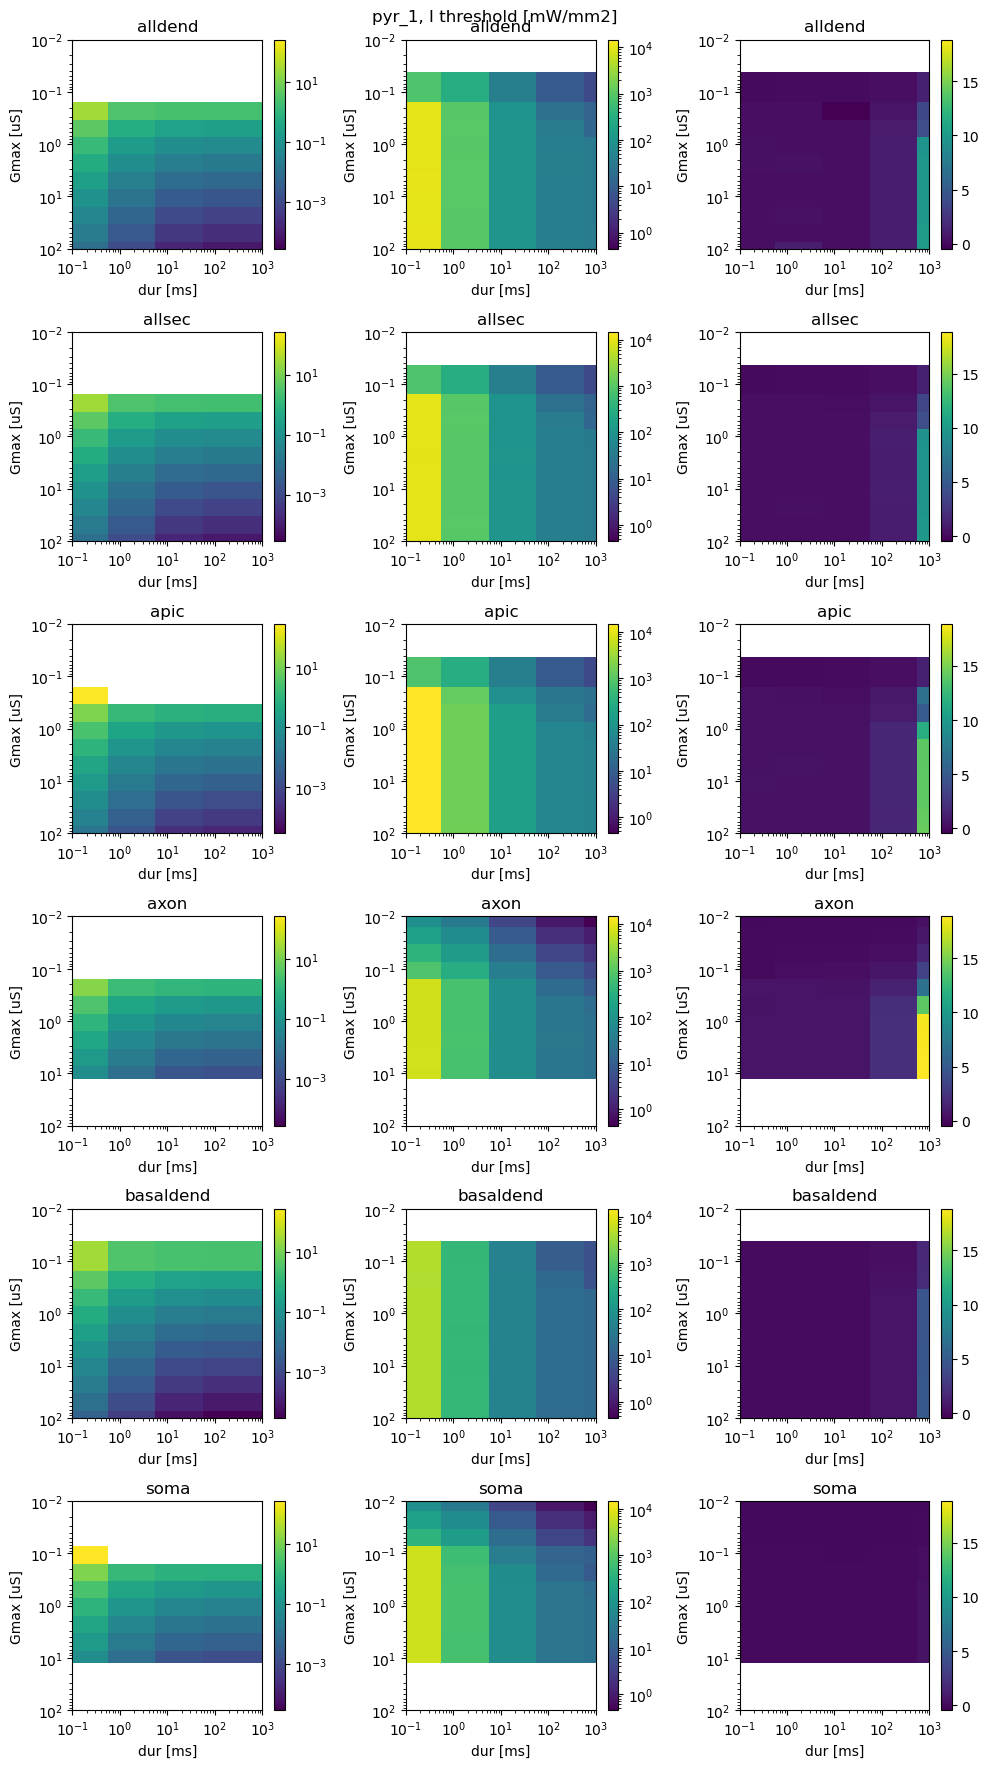

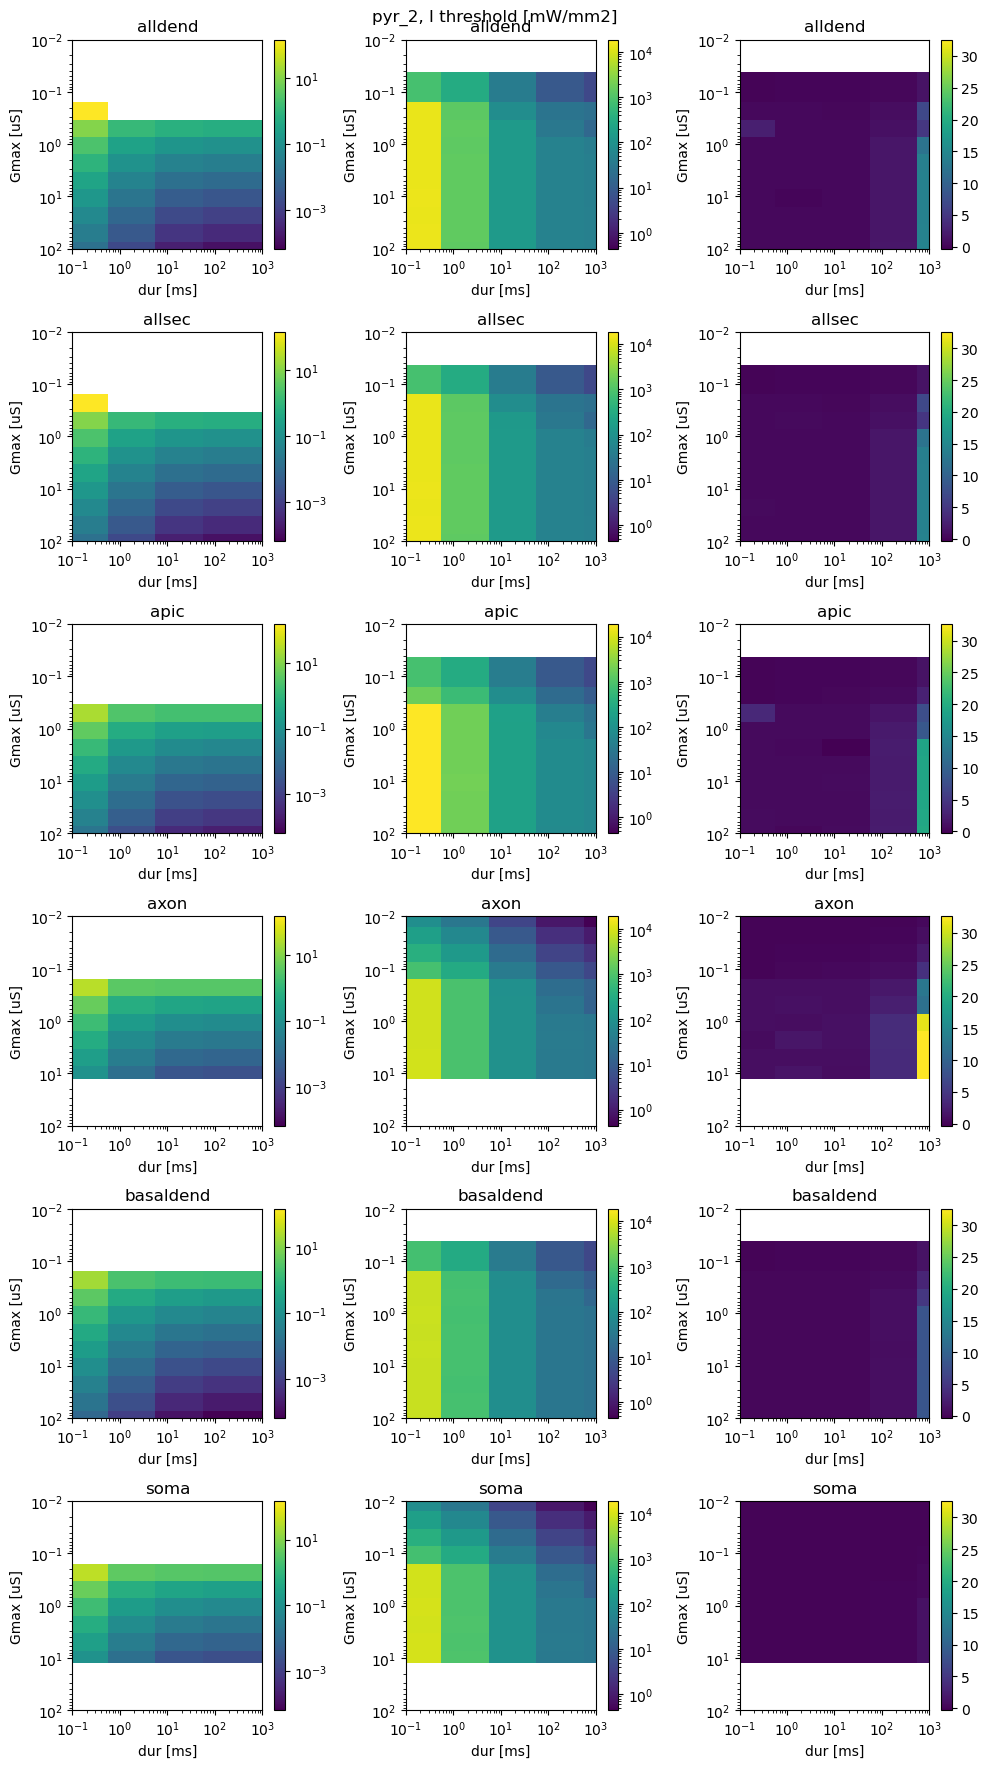

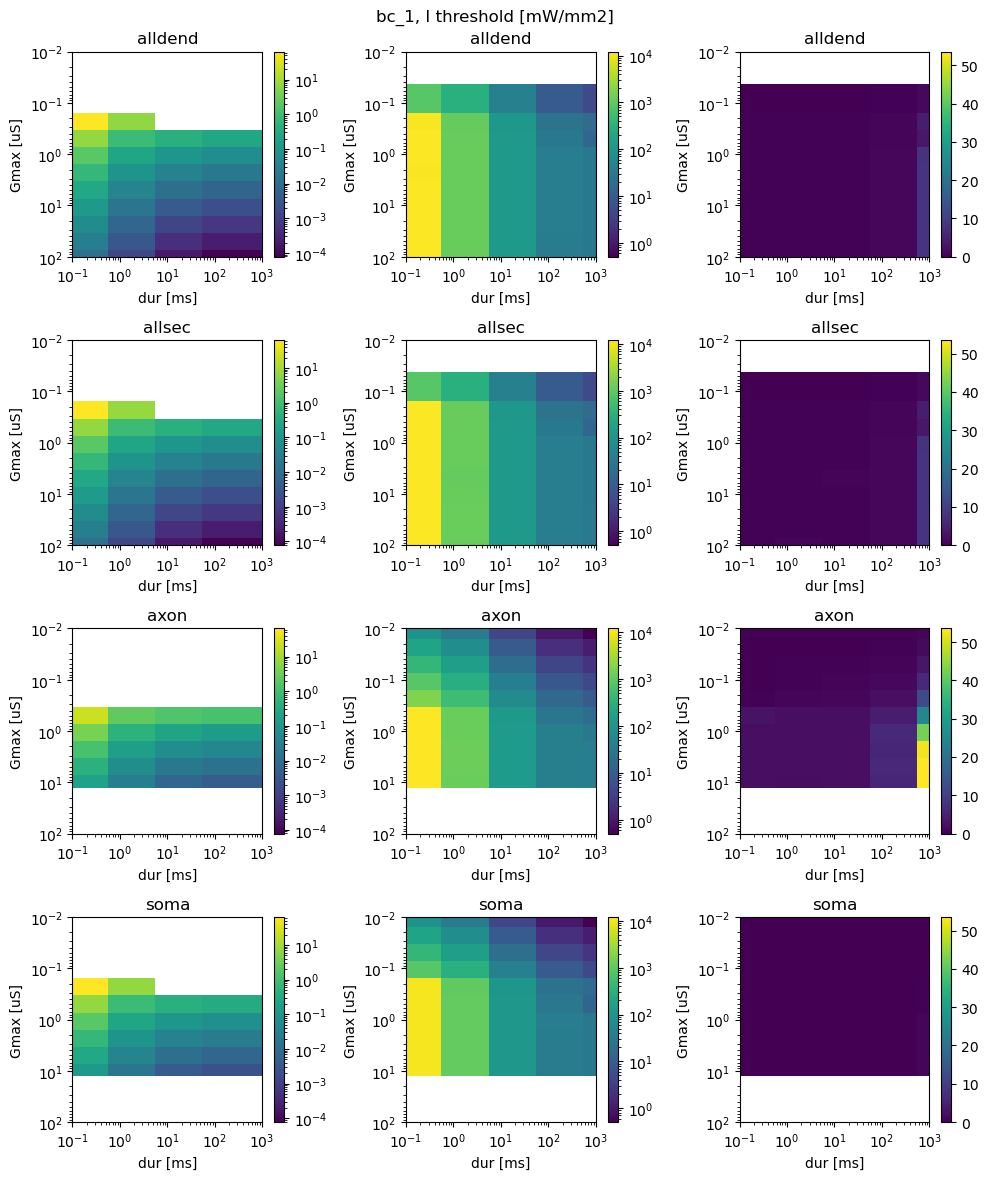

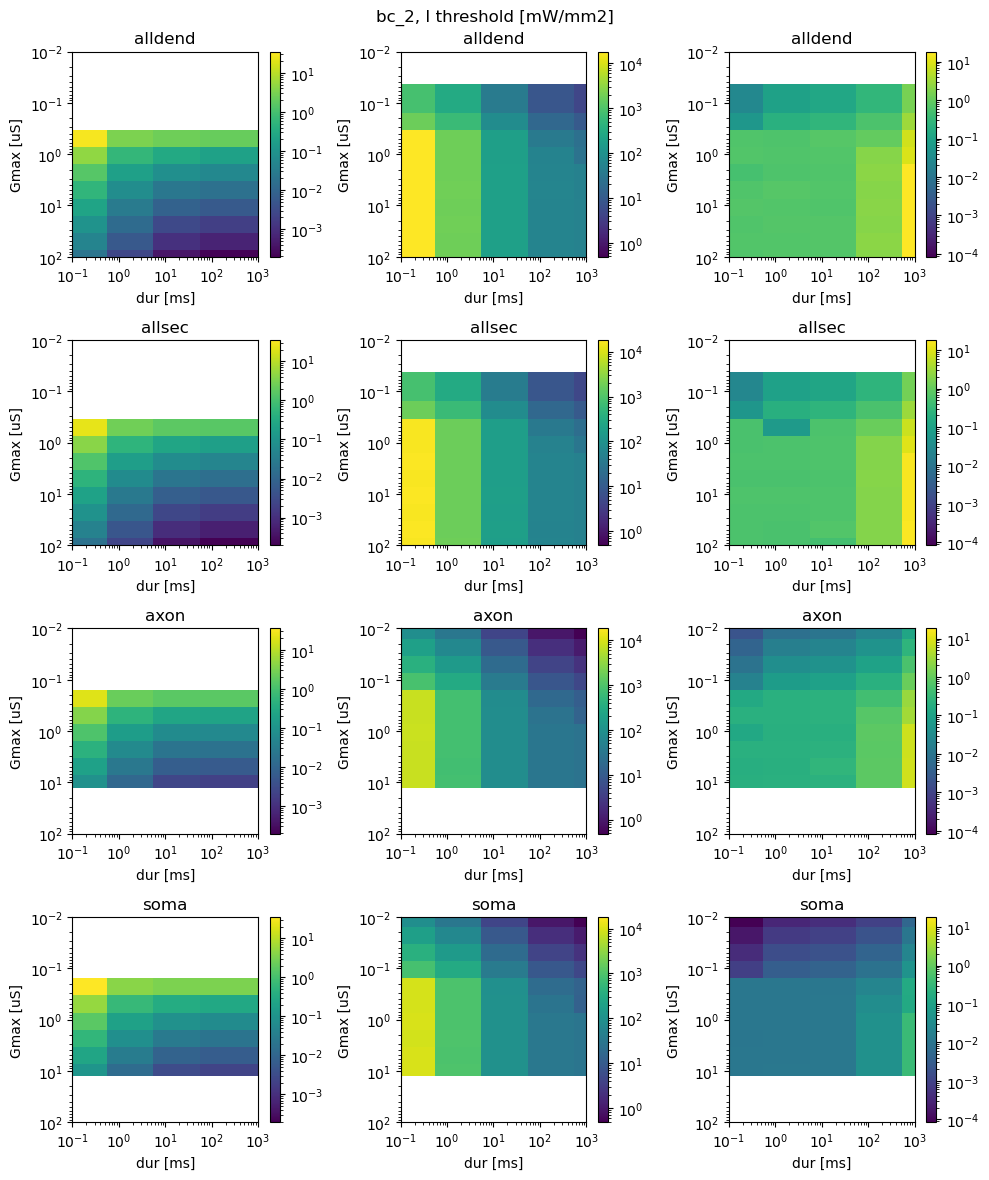

In [5]:
variables = ['opsinlocations','neurontemplate']
print([unique_values_columns_master[key] for key in variables])
levels = [0.1,1,10]
norm_log_cntr = cm.colors.LogNorm(vmax=levels[-1]*10, vmin=levels[0])
for neurontemplate in unique_values_columns_master['neurontemplate']:
    fig_df = master_df[selection_generator(master_df,unique_values_columns=unique_values_columns_master,neurontemplate=neurontemplate)]
    uOpsinLocations = fig_df['opsinlocations'].unique()
    fig,axs = plt.subplots(len(uOpsinLocations),3,tight_layout = True,figsize = (10,3*len(uOpsinLocations)))
    for i,datalabel in enumerate(['amp','TAC', 'gchr2']):
        Imin = np.min(fig_df[datalabel])
        Imax = np.max(fig_df[datalabel])
        if Imin<0:
            norm = cm.colors.Normalize(vmax=Imax, vmin=Imin)
        else:
            norm = cm.colors.LogNorm(vmax=Imax, vmin=Imin)
        for oL,ax in zip(uOpsinLocations,axs[:,i]):
            intm_df = fig_df[fig_df['opsinlocations']==oL]
            data_toplot = EcF.prepareDataforInterp(np.array((intm_df['dur'],intm_df['Gmax'],intm_df[datalabel])).T,'ninterp')
            yY, zZ = np.meshgrid(list(intm_df['dur'].unique()),list(intm_df['Gmax'].unique()))

            im,cb = EcF.slicePlot(data_toplot,ax,fig,plotGrid=(yY,zZ),structured=True, norm=norm)
            ax.set_xscale('log')
            ax.set_xlim((min(intm_df['dur'].unique()),max(intm_df['dur'].unique())))
            ax.set_yscale('log')
            ax.set_ylim((1e-2,1e2))
            ax.invert_yaxis()
            ax.set_xlabel('dur [ms]')
            ax.set_ylabel('Gmax [uS]')
            ax.set_title(f'{oL}')
    fig.suptitle(f'{neurontemplate}, I threshold [mW/mm2]')
    print()

# Pyramidal cells
## Strength duration curve plots
- rows different Gmax
- colors different opsin position

Intensity: For long pulse durations seems to have converged to rheobase.\
TAC: at low Gmax no convergence, moroever curves of different opsin locations cross

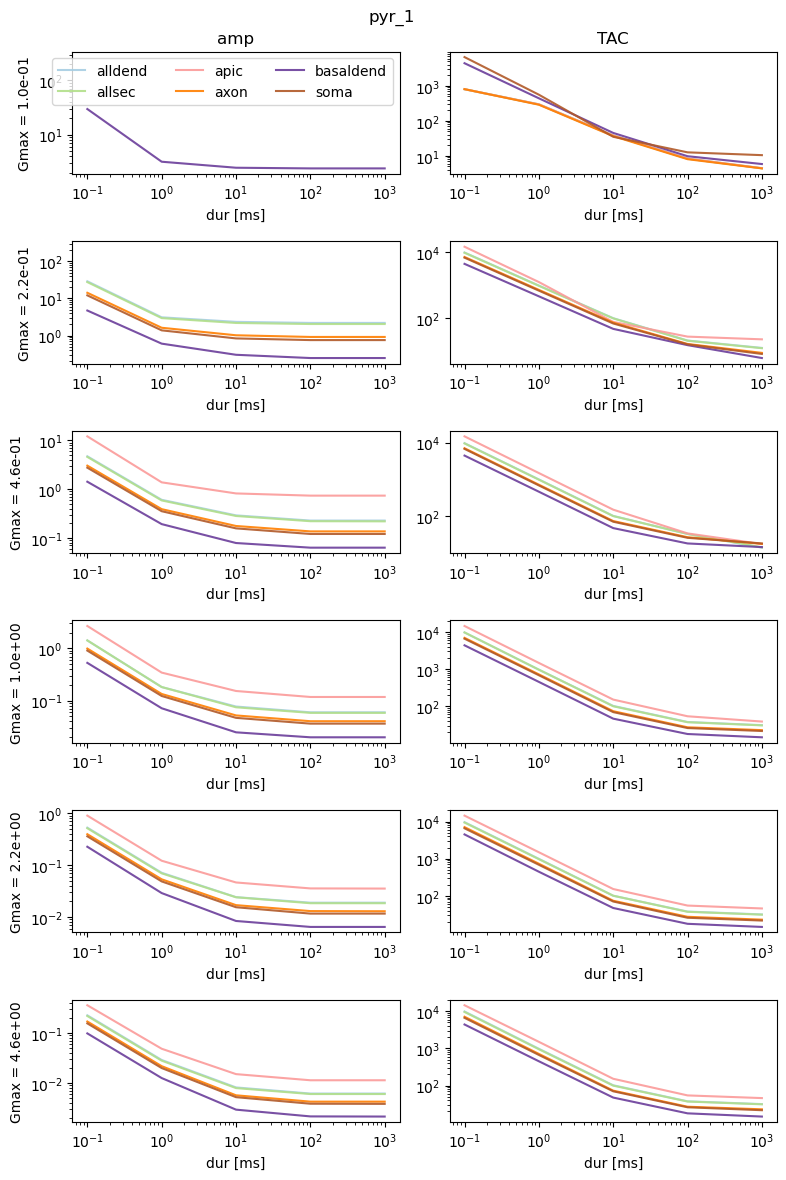

In [6]:

colors = plt.get_cmap('Paired',len(unique_values_columns_master['opsinlocations'])).colors
colorpairs = {x:clr for x,clr in zip(unique_values_columns_master['opsinlocations'],colors)}
linestyle_str = ['solid', 'dotted', 'dashed', 'dashdot']
uGmax = np.sort(master_df['Gmax'].unique())[3:-4]

fig,axs = plt.subplots(len(uGmax),2,tight_layout = True,figsize = (8,2*len(uGmax)))
for neurontemplate,linestyle in zip(unique_values_columns_master['neurontemplate'][:1],linestyle_str):
    fig_df = master_df[selection_generator(master_df,unique_values_columns=unique_values_columns_master,neurontemplate=neurontemplate)]
    uGmax = np.sort(fig_df['Gmax'].unique())[3:-4]
    for i,datalabel in enumerate(['amp','TAC']):
        for uG,ax in zip(uGmax,axs[:,i]):
            logscale = False
            intm_df = fig_df[fig_df['Gmax']==uG]
            uOpsinLocations = [x for x in intm_df['opsinlocations'].unique()]
            for oL in uOpsinLocations:
                clr = colorpairs[oL]
                plot_df = intm_df[intm_df['opsinlocations']==oL]
                xdata = plot_df['dur']
                ydata = plot_df[datalabel]
                ax.plot(xdata,ydata,color=clr,alpha=0.9,linestyle=linestyle,label=oL)
                if sum(~ np.isnan(ydata))>0:
                    logscale = True
            if logscale:
                ax.set_xscale('log')
                ax.set_yscale('log')
            ax.set_xlabel('dur [ms]')
            if i==0:
                ax.set_ylabel(f'Gmax = {uG:0.1e}')
            if uG == uGmax[0]:
                ax.set_title(datalabel)
                if i==0:
                    ax.legend(ncol=3)


    fig.suptitle(f'{neurontemplate}')
    print()

## STATISTICS
Pooled all simulations together\
Check if categories (neurontemplate, opsinlocations, Gmax and dur) give different results\


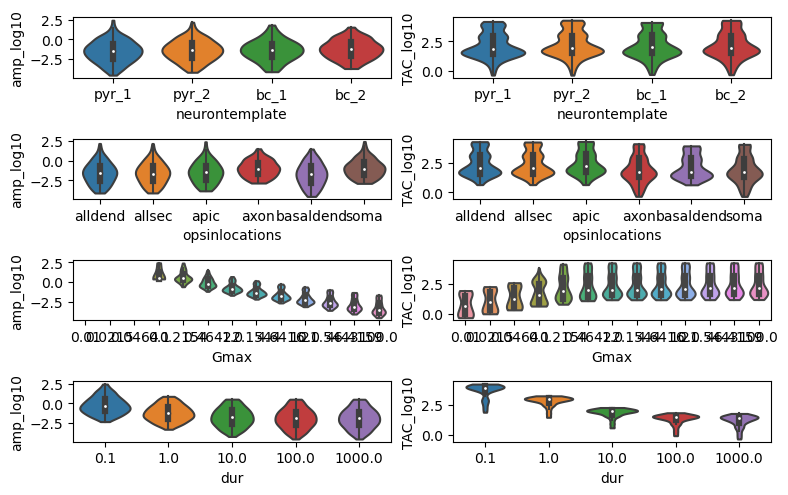

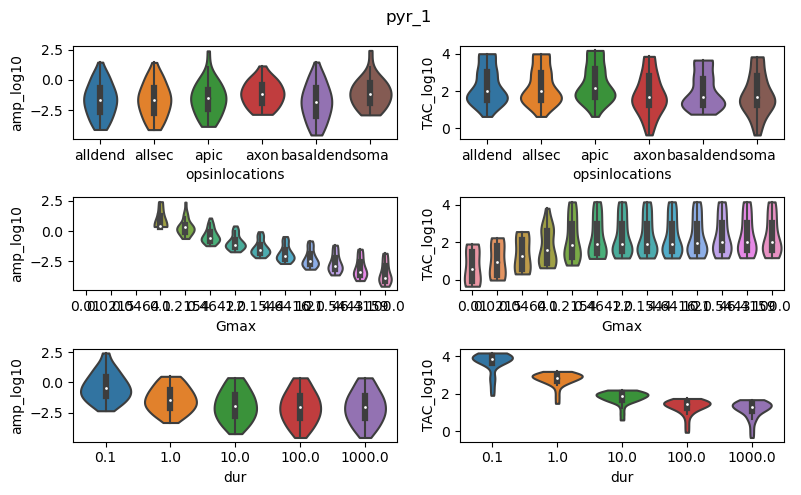

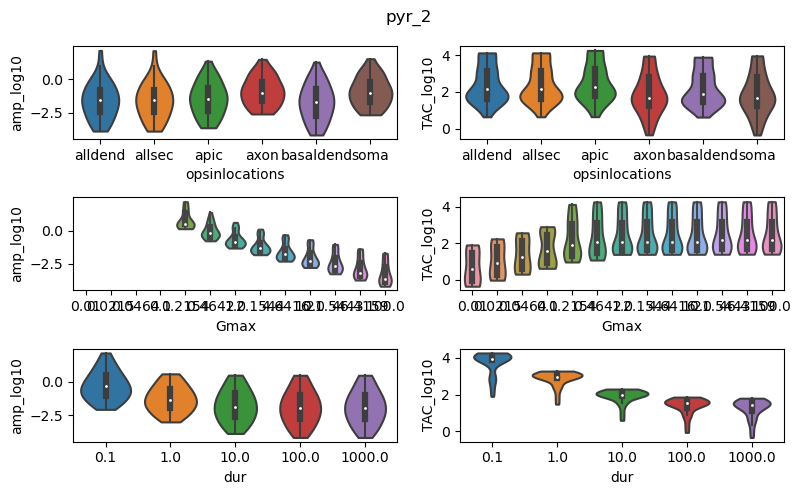

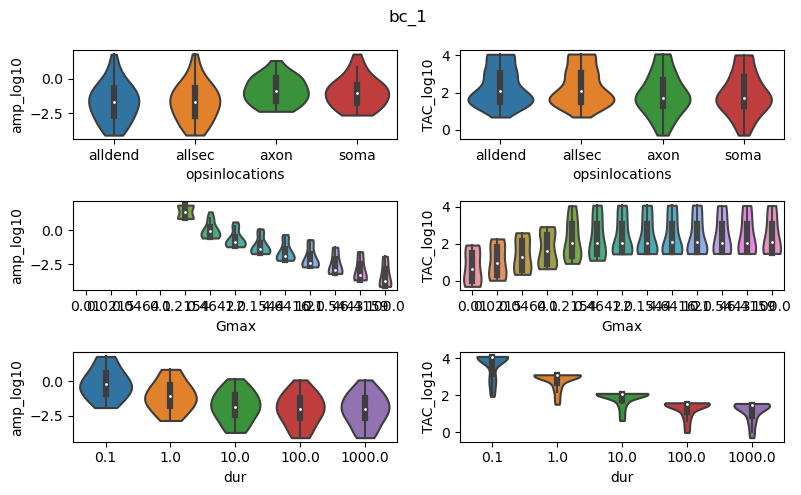

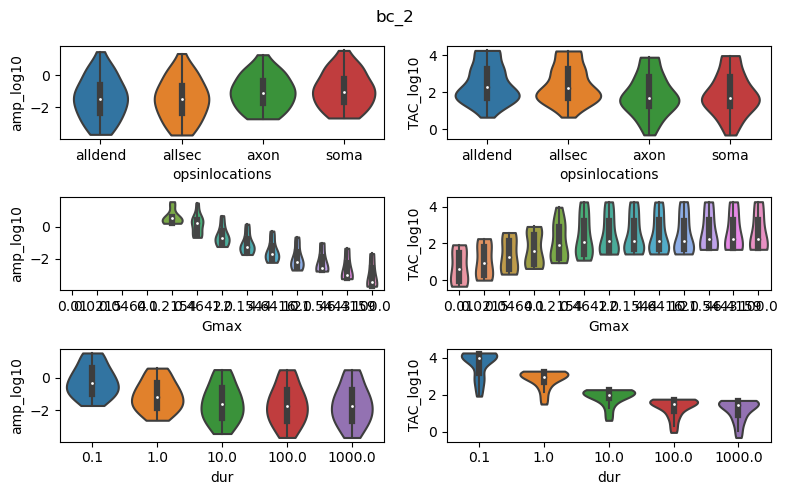

In [7]:
fig,axs = plt.subplots(4,2,tight_layout = True,figsize=(8,5))
for i,pool in enumerate(['neurontemplate','opsinlocations','Gmax','dur']):
    sns.violinplot(data=master_df,y='amp_log10',x=pool,ax=axs[i,0],cut=0)
    sns.violinplot(data=master_df,y='TAC_log10',x=pool,ax=axs[i,1],cut=0)
for nt in unique_values_columns_master['neurontemplate']:
    idx = master_df['neurontemplate']==nt
    fig,axs = plt.subplots(3,2,tight_layout = True,figsize=(8,5))
    for i,pool in enumerate(['opsinlocations','Gmax','dur']):
        sns.violinplot(data=master_df[idx],y='amp_log10',x=pool,ax=axs[i,0],cut=0)
        sns.violinplot(data=master_df[idx],y='TAC_log10',x=pool,ax=axs[i,1],cut=0)
    fig.suptitle(nt)

### Kruskal-Wallis H-test

{'amp_log10': {'all': {'neurontemplate': (3.979652086241692, 0.2636697364534318), 'opsinlocations': (39.30807522427982, 2.058766367964106e-07), 'Gmax': (556.3422355116936, 2.1980918587907923e-111), 'dur': (164.7515698167895, 1.3985922175123615e-34)}}, 'TAC_log10': {'all': {'neurontemplate': (2.6197714213442813, 0.45403389986110654), 'opsinlocations': (67.61191991848679, 3.215403966609888e-13), 'Gmax': (162.7849489643435, 1.4210493523338217e-28), 'dur': (782.4318158221737, 4.90473068633569e-168)}}}


Text(0.5, 1.0, 'Kruskal Wallis')

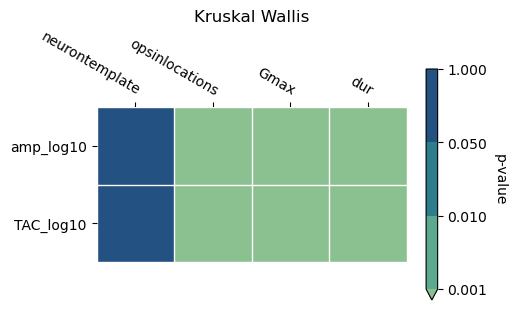

In [8]:
# red/green colors
# colors = np.array([[189,0,38],[166,217,106],[102,189,99],[26,152,80]])/256
# colors = np.flipud(colors)
# cmap = LinearSegmentedColormap.from_list('my_cmap', colors, N=colors.shape[0])
# boundaries  = [0.001,0.01,0.05,1.0]
# boundnorm = cm.colors.BoundaryNorm(boundaries,len(boundaries),extend='min')
# blue green
colors = np.array(sns.color_palette("crest", n_colors=10))
colors = colors[[0,2,5,8],:]
cmap = LinearSegmentedColormap.from_list('my_cmap', colors, N=colors.shape[0])
boundaries  = [0.001,0.01,0.05,1.0]
boundnorm = cm.colors.BoundaryNorm(boundaries,len(boundaries),extend='min')


KW_dict = {}
features = ['amp_log10','TAC_log10']
classes = [x for x in all_settings_columns[::-1] if not ('_log10' in x or x=='nPulse')]
for feat in features:
    KW_dict[feat] = {'all':{}}
    for pool in classes:
        pooledData = [list(master_df[feat][master_df[pool]==ukey]) for ukey in unique_values_columns_master[pool]]
        KW_dict[feat]['all'][pool] = stats.kruskal(*pooledData,nan_policy='omit')[:]
print(KW_dict)

heatmapdata = np.zeros((len(features),len(classes)))
for ifeat,feat in enumerate(features):
    for ipool,pool in enumerate(classes):
        heatmapdata[ifeat,ipool] = KW_dict[feat]['all'][pool][1]

fig,ax= plt.subplots(1,1,figsize = (5,3))
heatmap(heatmapdata,features,classes,ax=ax,norm=boundnorm,cmap=cmap,cbarlabel='p-value')
ax.set_title('Kruskal Wallis')

### Mann Whitney U Test and Wilcoxon signed-rank test
WSRT: hypothesis that two related paired samples come from the same distribution. In particular, it tests whether the distribution of the differences x - y is symmetric about zero.

Wilcoxon signed Rank test not equal


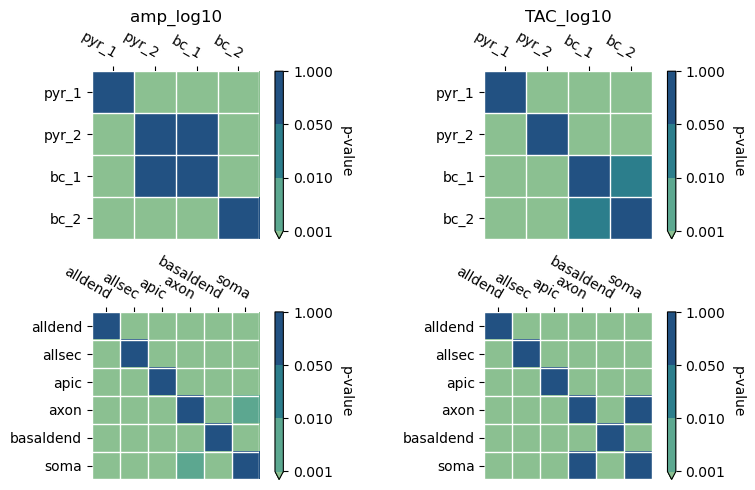

In [9]:
classes_toplot = ['neurontemplate','opsinlocations']
MWU_dict = {}
WSRT_dict = {}
for feat in features:
    MWU_dict[feat] = {'all':{}}
    WSRT_dict[feat] = {'all':{}}
    for pool in classes_toplot:
        ukeys =  unique_values_columns_master[pool]
        mytest_MWU = np.ones((len(ukeys),len(ukeys),2))
        mytest_WSRT = np.ones((len(ukeys),len(ukeys),2))
        for i in range(len(ukeys)):
            for j in range(len(ukeys)):
                x = np.array(master_df[feat][master_df[pool]==ukeys[i]])
                x = x[~np.isnan(x)]
                y = np.array(master_df[feat][master_df[pool]==ukeys[j]])
                y = y[~np.isnan(y)]
                if len(y)>0 and len(x)>0:
                    mytest_MWU[i,j,0] = stats.mannwhitneyu(x,y)[0]
                    mytest_MWU[i,j,1] = stats.mannwhitneyu(x,y)[1]

                df1 = master_df[master_df[pool]==ukeys[i]]
                df2 = master_df[master_df[pool]==ukeys[j]]
                df1 = df1.set_index([x for x in classes if not (pool in x or x in pool)])[feat]
                df2 = df2.set_index([x for x in classes if not (pool in x or x in pool)])[feat]
                diff_df = pd.merge(df1, df2, left_index=True, right_index = True, suffixes=('_0', '_1'),validate='one_to_many')
                diff_df = diff_df[feat+'_1']-diff_df[feat+'_0']
                xydiff = np.array(diff_df)
                xydiff = xydiff[~np.isnan(xydiff)]
                if  len(xydiff)>0 and i!=j:
                    mytest_WSRT[i,j,0] = stats.wilcoxon(xydiff)[0]
                    mytest_WSRT[i,j,1] = stats.wilcoxon(xydiff)[1]
        MWU_dict[feat]['all'][pool] = mytest_MWU
        WSRT_dict[feat]['all'][pool] = mytest_WSRT

print('Wilcoxon signed Rank test not equal')
fig,axs = plt.subplots(len(classes_toplot),2,tight_layout=True,figsize=(8,5))
for pool,ax in zip(classes_toplot,axs):
    ukeys =  unique_values_columns_master[pool]
    for ifeat,feat in enumerate(features):
        #im,_ = heatmap(MWU_dict[feat]['all'][pool][:,:,1], ukeys, ukeys, ax=ax[ifeat*2], norm=boundnorm,cmap=cmap,cbarlabel='p-value')
        im,_ = heatmap(WSRT_dict[feat]['all'][pool][:,:,1], ukeys, ukeys, ax=ax[ifeat], norm=boundnorm,cmap=cmap,cbarlabel='p-value')
        if pool==classes_toplot[0]:
            ax[ifeat].set_title(feat)

Wilcoxon signed Rank test not equal


Text(0.5, 0.98, 'row less than column')

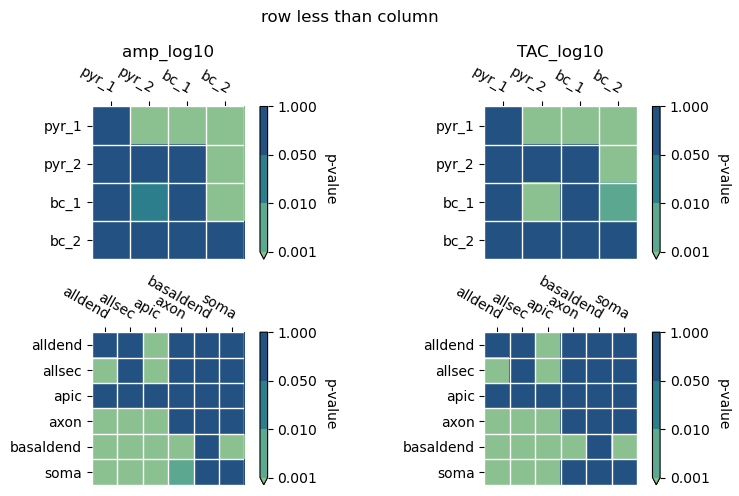

In [10]:
classes_toplot = ['neurontemplate','opsinlocations']
MWU_dict = {}
WSRT_dict = {}
for feat in features:
    MWU_dict[feat] = {'all':{}}
    WSRT_dict[feat] = {'all':{}}
    for pool in classes_toplot:
        ukeys =  unique_values_columns_master[pool]
        mytest_MWU = np.ones((len(ukeys),len(ukeys),2))
        mytest_WSRT = np.ones((len(ukeys),len(ukeys),2))
        for i in range(len(ukeys)):
            for j in range(len(ukeys)):
                x = np.array(master_df[feat][master_df[pool]==ukeys[i]])
                x = x[~np.isnan(x)]
                y = np.array(master_df[feat][master_df[pool]==ukeys[j]])
                y = y[~np.isnan(y)]
                if len(y)>0 and len(x)>0:
                    mytest_MWU[i,j,0] = stats.mannwhitneyu(x,y)[0]
                    mytest_MWU[i,j,1] = stats.mannwhitneyu(x,y)[1]

                df1 = master_df[master_df[pool]==ukeys[i]]
                df2 = master_df[master_df[pool]==ukeys[j]]
                df1 = df1.set_index([x for x in classes if not (pool in x or x in pool)])[feat]
                df2 = df2.set_index([x for x in classes if not (pool in x or x in pool)])[feat]
                diff_df = pd.merge(df1, df2, left_index=True, right_index = True, suffixes=('_0', '_1'),validate='one_to_many')
                diff_df = diff_df[feat+'_1']-diff_df[feat+'_0']
                xydiff = np.array(diff_df)
                xydiff = xydiff[~np.isnan(xydiff)]
                if  len(xydiff)>0 and i!=j:
                    mytest_WSRT[i,j,0] = stats.wilcoxon(xydiff,alternative='greater')[0]
                    mytest_WSRT[i,j,1] = stats.wilcoxon(xydiff,alternative='greater')[1]
        MWU_dict[feat]['all'][pool] = mytest_MWU
        WSRT_dict[feat]['all'][pool] = mytest_WSRT

print('Wilcoxon signed Rank test not equal')
fig,axs = plt.subplots(len(classes_toplot),2,tight_layout=True,figsize=(8,5))
for pool,ax in zip(classes_toplot,axs):
    ukeys =  unique_values_columns_master[pool]
    for ifeat,feat in enumerate(features):
        #im,_ = heatmap(MWU_dict[feat]['all'][pool][:,:,1], ukeys, ukeys, ax=ax[ifeat*2], norm=boundnorm,cmap=cmap,cbarlabel='p-value')
        im,_ = heatmap(WSRT_dict[feat]['all'][pool][:,:,1], ukeys, ukeys, ax=ax[ifeat], norm=boundnorm,cmap=cmap,cbarlabel='p-value')
        if pool==classes_toplot[0]:
            ax[ifeat].set_title(feat)
fig.suptitle('row less than column')

### Same test split over cells
From results below (see ratio wrt to soma) would have suspected soma vs axon and alldend vs allsec would not be statistically significant!

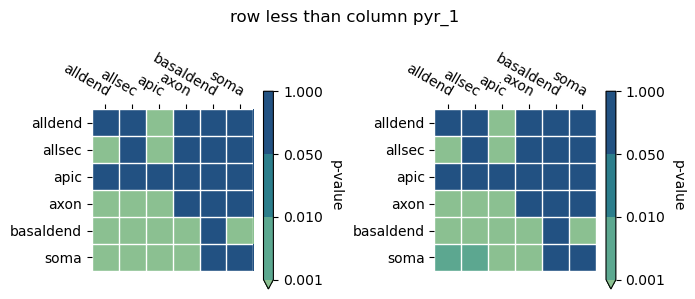

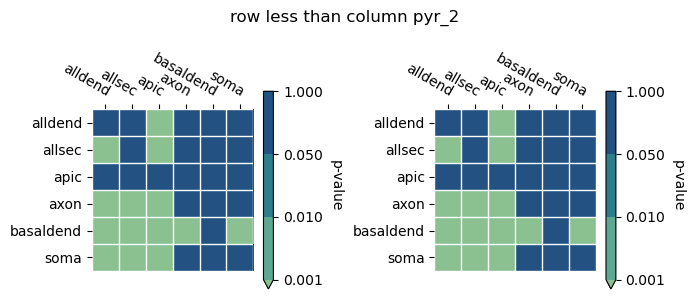

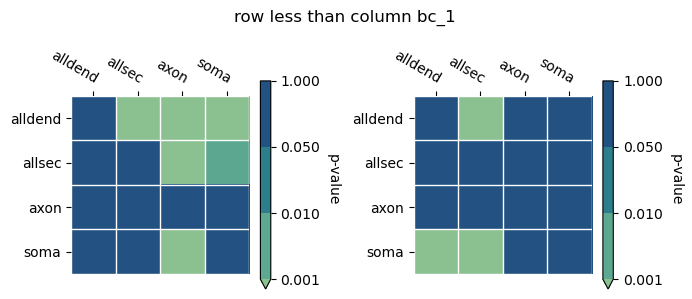

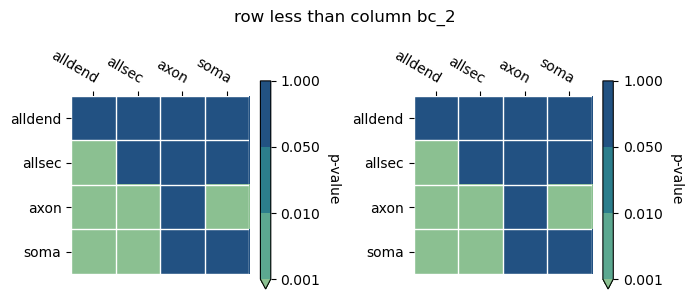

In [11]:

subclasses = ['opsinlocations']
for cell in unique_values_columns_master['neurontemplate'][:]:
    intm_df = master_df[master_df['neurontemplate']==cell]
    for feat in features:
        WSRT_dict[feat][cell] = {}
        for pool in subclasses:
            if pool == 'opsinlocations':
                ukeys = intm_df[pool].unique()
            else:
                ukeys = unique_values_columns_master[pool]
            mytest_WSR = np.ones((len(ukeys),len(ukeys),2))
            for i in range(len(ukeys)):
                for j in range(len(ukeys)):
                    #WSRT
                    df1 = intm_df[intm_df[pool]==ukeys[i]]
                    df2 = intm_df[intm_df[pool]==ukeys[j]]
                    df1 = df1.set_index([x for x in classes if not (pool in x or x in pool)])[feat]
                    df2 = df2.set_index([x for x in classes if not (pool in x or x in pool)])[feat]
                    diff_df = pd.merge(df1, df2, left_index=True, right_index = True, suffixes=('_0', '_1'),validate='one_to_many')
                    diff_df = diff_df[feat+'_1']-diff_df[feat+'_0']
                    xydiff = np.array(diff_df)
                    xydiff = xydiff[~np.isnan(xydiff)]
                    if  len(xydiff)>0 and i!=j:
                        mytest_WSR[i,j,0] = stats.wilcoxon(xydiff,alternative='greater')[0]
                        mytest_WSR[i,j,1] = stats.wilcoxon(xydiff,alternative='greater')[1]

            WSRT_dict[feat][cell][pool] = mytest_WSR

    fig,axs = plt.subplots(len(subclasses),2,tight_layout=True,figsize=(7,3))
    if len(subclasses)==1:
        axs = [axs]
    for pool,ax in zip(subclasses,axs):
        if pool == 'opsinlocations':
            ukeys = intm_df[pool].unique()
        else:
            ukeys =  unique_values_columns_master[pool]
        for ifeat,feat in enumerate(features):
            im,_ = heatmap(WSRT_dict[feat][cell][pool][:,:,1], ukeys, ukeys, ax=ax[ifeat], norm=boundnorm,cmap=cmap,cbarlabel='p-value')
            if pool==classes[0]:
                ax[ifeat].set_title(feat)
    fig.suptitle(f'row less than column {cell}')

### Wilcoxon signed rank test for all opsin neuron template locations
This identifies most excitable combination

['pyr_1alldend' 'pyr_1allsec' 'pyr_1apic' 'pyr_1axon' 'pyr_1basaldend'
 'pyr_1soma' 'pyr_2alldend' 'pyr_2allsec' 'pyr_2apic' 'pyr_2axon'
 'pyr_2basaldend' 'pyr_2soma' 'bc_1alldend' 'bc_1allsec' 'bc_1axon'
 'bc_1soma' 'bc_2alldend' 'bc_2allsec' 'bc_2axon' 'bc_2soma']


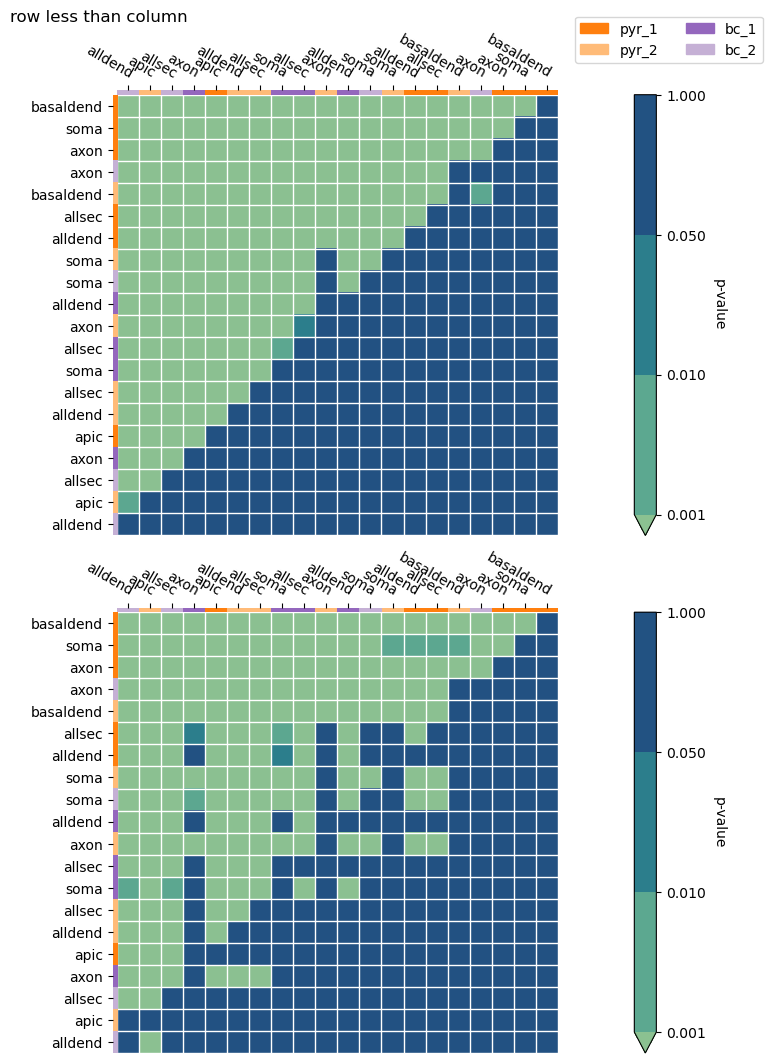

In [12]:

colors = np.array(sns.color_palette("crest", n_colors=10))
colors = colors[[0,2,5,8],:]
cmap = LinearSegmentedColormap.from_list('my_cmap', colors, N=colors.shape[0])
boundaries  = [0.001,0.01,0.05,1.0]
boundnorm = cm.colors.BoundaryNorm(boundaries,len(boundaries),extend='min')
features = ['amp_log10','TAC_log10']
classes = ['neurontemplate','opsinlocations','Gmax','dur']
wsrt_df = master_df[features+classes].copy()
wsrt_df['wsrt_keys'] = wsrt_df.apply(lambda x: f"{x['neurontemplate']}{x['opsinlocations']}",axis=1)
print(wsrt_df['wsrt_keys'].unique())

WSRT_dict = {}
ukeys =  wsrt_df['wsrt_keys'].unique()
for feat in features:
    WSRT_dict[feat] = {}
    mytest_WSRT = np.ones((len(ukeys),len(ukeys),2))
    for i in range(len(ukeys)):
        for j in range(len(ukeys)):
            df1 = wsrt_df[wsrt_df['wsrt_keys']==ukeys[i]]
            df2 = wsrt_df[wsrt_df['wsrt_keys']==ukeys[j]]
            df1 = df1.set_index([x for x in ['Gmax','dur']])[feat]
            df2 = df2.set_index([x for x in ['Gmax','dur']])[feat]
            diff_df = pd.merge(df1, df2, left_index=True, right_index = True, suffixes=('_0', '_1'),validate='one_to_many')
            diff_df = diff_df[feat+'_1']-diff_df[feat+'_0']
            xydiff = np.array(diff_df)
            xydiff = xydiff[~(np.isnan(xydiff)|np.isinf(xydiff))]
            if  len(xydiff)>0 and i!=j:
                wstats = stats.wilcoxon(xydiff,alternative='greater')
                mytest_WSRT[i,j,0] = wstats[0]
                mytest_WSRT[i,j,1] = wstats[1]
    WSRT_dict[feat] = mytest_WSRT



row_colors = np.array(sns.color_palette("tab20"))
row_colors = row_colors[[2,3,8,9],:]
row_colors_dict = {ol:clr for ol,clr in zip(wsrt_df['neurontemplate'].unique(),row_colors)}
# row_colors = np.tile(np.array([[1,0,0,0.99],[0,1,0,0.99]]),(int(len(ukeys)/2),1))[:,None,:]
row_colors_dict

fig,axs = plt.subplots(2,1,tight_layout=True,figsize=(13*1.2,9*1.2))
for ifeat, (feat, ax) in enumerate(zip(features,axs)):
    greatest = np.sum(WSRT_dict[feat][:,:,1]<0.001,axis=1)
    if ifeat==0:
        idx_column = np.argsort(greatest)
        idx_row = np.flip(idx_column)
    row_labels = ukeys[idx_row]
    column_labels = ukeys[idx_column]
    row_colors = np.array([i for x in row_labels for k,i in row_colors_dict.items() if k in x])[:,None,:]
    column_colors = np.array([i for x in column_labels for k,i in row_colors_dict.items() if k in x])[None,:,:]
    row_labels = [x.rsplit('_',1)[1][1:] for x in row_labels]
    column_labels = [x.rsplit('_',1)[1][1:] for x in column_labels]

    data_toplot = WSRT_dict[feat][:,idx_column,1]
    im,_ = heatmap2(data_toplot[idx_row,:], row_labels, column_labels, ax=ax, row_colors=row_colors, column_colors=column_colors, norm=boundnorm,cmap=cmap,cbarlabel='p-value')
    if pool==classes[0]:
        ax[ifeat].set_title(feat)
fig.suptitle(f'row less than column')
legendpatches = []
for k,v in row_colors_dict.items():
    legendpatches.append(mpl.patches.Patch(color=v, label=k))
fig.legend(handles = legendpatches, bbox_to_anchor = (0.93,0.98), ncol=2)

Gmax lower pvalues when comparison with higher Gmax (see Gmax == 100 vs Gmax == 0.4642)

## ratio Strength duration curves relative to soma SDC

Observation:\
- almost constant over duration / except TAC at high pulse durations
- basal dend best location, apical worst

In [ ]:
reference = 'soma'
colors = plt.get_cmap('Paired',len(unique_values_columns_master['opsinlocations'])).colors
colorpairs = {x:clr for x,clr in zip(unique_values_columns_master['opsinlocations'],colors)}
linestyle_str = ['solid', 'dotted', 'dashed', 'dashdot']
uGmax = np.sort(master_df['Gmax'].unique())[3:-4]
fig,axs = plt.subplots(len(uGmax),2,tight_layout = True,figsize = (8,2*len(uGmax)))
for neurontemplate,linestyle,alpha in zip(unique_values_columns_master['neurontemplate'][:1],linestyle_str,[0.9,0.7]):
    fig_df = master_df[selection_generator(master_df,unique_values_columns=unique_values_columns_master,neurontemplate=neurontemplate)]


    for i,datalabel in enumerate(['amp','TAC']):
        for uG,ax in zip(uGmax,axs[:,i]):
            logscale = False
            intm_df = fig_df[fig_df['Gmax']==uG]
            uOpsinLocations = [x for x in intm_df['opsinlocations'].unique() if x != reference]
            for oL in uOpsinLocations:
                clr = colorpairs[oL]
                plot_df = intm_df[intm_df['opsinlocations']==oL]
                xdata = plot_df['dur']
                ydata = plot_df[datalabel]
                ref_ydata = intm_df[intm_df['opsinlocations']==reference][datalabel]
                if len(ydata)==len(ref_ydata):
                    ydata = np.array(ydata)/np.array(ref_ydata)
                    ax.plot(xdata,ydata,color=clr,alpha=alpha,linestyle=linestyle,label=oL)
                    if sum(~ np.isnan(ydata))>0:
                        logscale = True
            if logscale:
                ax.set_xscale('log')
                ax.set_yscale('log')
                ax.set_ylim([0.1,10])
            ax.set_xlabel('dur [ms]')
            if i==0:
                ax.set_ylabel(f'Gmax = {uG:0.1e}')
            if uG == uGmax[0]:
                ax.set_title(datalabel)
                if i==0:
                    ax.legend(ncol=3)


    fig.suptitle(f'{neurontemplate}')
    print()

## Curve fit of Gmax
https://www.khanacademy.org/math/ap-statistics/inference-slope-linear-regression/inference-slope/v/confidence-interval-slope
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [13]:
def calcr2(y,yestim,nparams,type='adjusted'):
    idx = ~(np.isnan(y) | np.isinf(y))
    y = y[idx]
    yestim = yestim[idx]
    ssres = np.sum((y-yestim)**2)
    sstot = np.sum((y-np.mean(y))**2)
    r2 = 1-ssres/sstot
    if type=='adjusted':
        r2adj = 1-(1-r2)*(len(y)-1)/(len(y)-nparams)
        return r2adj
    return r2

def durfit(df,typer2='adjusted'):
    Hill_Lap = lambda pd,I0,tau: I0/(1-np.exp(-pd/tau))
    vHill_Lap = np.vectorize(Hill_Lap)
    power_ampTAC = lambda TAC,a,b,c: a*TAC**b+c
    loglog_ampTAC = lambda TAC,slope,intercept: slope*np.log10(TAC)+intercept
    vpower_ampTAC = np.vectorize(power_ampTAC)
    vloglog_ampTAC = np.vectorize(loglog_ampTAC)

    xdata = df['dur'].to_numpy()
    ydata_TAC = df['TAC'].to_numpy()
    ydata_amp = df['amp'].to_numpy()
    ydata_amp_log10= df['amp_log10'].to_numpy()
    idx = ~(np.isnan(xdata) | np.isnan(ydata_TAC) |np.isinf(ydata_TAC) | np.isnan(ydata_amp) | np.isinf(ydata_amp) | np.isnan(ydata_amp_log10) | np.isinf(ydata_amp_log10))
    xdata = xdata[idx]; ydata_TAC = ydata_TAC[idx]; ydata_amp = ydata_amp[idx]; ydata_amp_log10 = ydata_amp_log10[idx]
    popt_TAC_hl, _ = optimize.curve_fit(Hill_Lap,xdata,ydata_TAC,p0=[np.min(ydata_TAC),1])
    popt_amp_power, _ = optimize.curve_fit(power_ampTAC,vHill_Lap(xdata,*popt_TAC_hl),ydata_amp,p0=[-2,0.6,0],bounds=([-10,-10,0],np.inf))
    popt_amp_hl, _ = optimize.curve_fit(Hill_Lap,xdata,ydata_amp,p0=[np.min(ydata_amp),1])
    #loglog fit amp_log10 vs TAC_log10
    res = stats.linregress(np.log10(vHill_Lap(xdata,*popt_TAC_hl)), ydata_amp_log10)

    popt_amp_loglog = [res.slope, res.intercept]
    r2_TAC = calcr2(ydata_TAC,vHill_Lap(xdata,*popt_TAC_hl),2,type=typer2)
    r2_amp_power = calcr2(ydata_amp,vpower_ampTAC(vHill_Lap(xdata,*popt_TAC_hl),*popt_amp_power),5,type=typer2)
    r2_amp_loglog = calcr2(ydata_amp_log10,vloglog_ampTAC(vHill_Lap(xdata,*popt_TAC_hl),*popt_amp_loglog),4,type=typer2)
    r2_amp_hl = calcr2(ydata_amp,vHill_Lap(xdata,*popt_amp_hl),2,type=typer2)

    # fig,axs = plt.subplots(2,3)
    # axs[0,0].scatter(np.log10(xdata),np.log10(ydata_TAC))
    # axs[0,0].plot(np.log10(xdata),np.log10(vHill_Lap(xdata,*popt_TAC_hl)))
    # axs[1,0].scatter(np.log10(ydata_TAC),np.log10(vHill_Lap(xdata,*popt_TAC_hl)))

    # axs[0,1].scatter(np.log10(xdata),np.log10(ydata_amp))
    # axs[0,1].plot(np.log10(xdata),np.log10(vpower_ampTAC(vHill_Lap(xdata,*popt_TAC_hl),*popt_amp_power)))
    # axs[0,1].plot(np.log10(xdata),vloglog_ampTAC(vHill_Lap(xdata,*popt_TAC_hl),*popt_amp_loglog))
    # axs[0,1].plot(np.log10(xdata),np.log10(vHill_Lap(xdata,*popt_amp_hl)))
    # axs[1,1].scatter(np.log10(ydata_amp),np.log10(vpower_ampTAC(vHill_Lap(xdata,*popt_TAC_hl),*popt_amp_power)))
    # axs[1,1].scatter(np.log10(ydata_amp),vloglog_ampTAC(vHill_Lap(xdata,*popt_TAC_hl),*popt_amp_loglog))
    # axs[1,1].scatter(np.log10(ydata_amp),np.log10(vHill_Lap(xdata,*popt_amp_hl)))

    # axs[0,2].scatter(np.log10(ydata_TAC),np.log10(ydata_amp))
    # axs[0,2].scatter(np.log10(vHill_Lap(xdata,*popt_TAC_hl)),np.log10(ydata_amp))
    # axs[0,2].plot(np.log10(vHill_Lap(xdata,*popt_TAC_hl)),np.log10(vpower_ampTAC(vHill_Lap(xdata,*popt_TAC_hl),*popt_amp_power)))
    # axs[0,2].plot(np.log10(vHill_Lap(xdata,*popt_TAC_hl)),vloglog_ampTAC(vHill_Lap(xdata,*popt_TAC_hl),*popt_amp_loglog))
    # axs[1,2].scatter(np.log10(ydata_amp),np.log10(vpower_ampTAC(vHill_Lap(xdata,*popt_TAC_hl),*popt_amp_power)))
    # axs[1,2].scatter(np.log10(ydata_amp),vloglog_ampTAC(vHill_Lap(xdata,*popt_TAC_hl),*popt_amp_loglog))

    return popt_TAC_hl, popt_amp_power, popt_amp_hl, popt_amp_loglog, r2_TAC, r2_amp_power, r2_amp_hl, r2_amp_loglog

def Gmaxfitafterdurfit(df,typer2 = 'adjusted',usedur:Literal['loglog', 'power']='power'):
    Hill_Lap = lambda pd,I0,tau: I0/(1-np.exp(-pd/tau))
    vHill_Lap = np.vectorize(Hill_Lap)
    power_ampTAC = lambda TAC,a,b,c: a*TAC**b+c
    vpower_ampTAC = np.vectorize(power_ampTAC)
    # get durfits
    popt_TAC_hl, popt_amp_power, popt_amp_hl, popt_amp_loglog, r2_TAC, r2_amp_power, r2_amp_hl, r2_amp_loglog = durfit(df,typer2=typer2)
    if usedur == 'loglog':
            amp_log10_fdur = lambda dur: popt_amp_loglog[0]*np.log10(vHill_Lap(dur,*popt_TAC_hl))+popt_amp_loglog[1]
            nparams_fdur = 2+2
            #10**(popt_amp_loglog[0]*np.log10(vHill_Lap(df['dur'],*popt_TAC_hl))+popt_amp_loglog[1]))
    elif usedur == 'power':
            nparams_fdur = 2+3
            amp_log10_fdur =lambda dur: np.log10(vpower_ampTAC(vHill_Lap(dur,*popt_TAC_hl),*popt_amp_power))
    else:
        raise ValueError('usedur should be loglog or power')
    vamp_log10_fdur = np.vectorize(amp_log10_fdur)
    df['amp_log10ampfdur_log10'] = df['amp_log10'] - vamp_log10_fdur(df['dur'])

    df['TACdur_log10'] = np.log10(df['TAC']/vHill_Lap(df['dur'],*popt_TAC_hl))
    single_linear_model = smf.ols(formula='amp_log10ampfdur_log10 ~ Gmax_log10', data=df).fit()
    p_Gmax_log10 = single_linear_model.params

    mymodel = lambda dur, Gmax: amp_log10_fdur(dur)+p_Gmax_log10['Gmax_log10']*np.log10(Gmax)+p_Gmax_log10['Intercept']
    vmymodel = np.vectorize(mymodel)
    amp_log10_estim = vmymodel(df['dur'],df['Gmax'])
    r2_tot = calcr2(df['amp_log10'],amp_log10_estim,nparams_fdur+2,type=typer2)
    return vmymodel, r2_tot, single_linear_model, popt_TAC_hl, popt_amp_power, popt_amp_hl, popt_amp_loglog, r2_TAC, r2_amp_power, r2_amp_hl, r2_amp_loglog



[29.67385213 37.49061563]
[7.16462999e-06 1.51367258e+00 2.42480558e-01]
[9.81085907 0.54104426 0.25340355 0.24383324 0.24369363]

amp_log10
Rsquared: 0.7330762541955047
slope (95%): -1.413779 +/- 0.061442
intercept (95%): -0.610660 +/- 0.060075

TAC_log10
Rsquared: 0.001142901675368939
slope (95%): 0.042522 +/- 0.090537
intercept (95%): 2.404027 +/- 0.088523

amp-dur
Rsquared: 0.04513004326137857
slope (95%): -4.182969 +/- 1.385752
intercept (95%): 2.365645 +/- 1.354936

TAC-dur
Rsquared: 0.01327810250797832
slope (95%): 252.035539 +/- 156.477852
intercept (95%): -143.435812 +/- 152.998124

ampdur_log10
Rsquared: 0.9200839759188332
slope (95%): -1.391252 +/- 0.029530
intercept (95%): -0.415127 +/- 0.028874

TACdur_log10
Rsquared: 0.12417089442842792
slope (95%): 0.077792 +/- 0.014880
intercept (95%): -0.069122 +/- 0.014549

ampdur_log10
Rsquared: 0.9185111347233328
slope (95%): -1.391537 +/- 0.029851
intercept (95%): -5.127653 +/- 0.029187

TACdur_log10
Rsquared: 0.12417089442842792
s

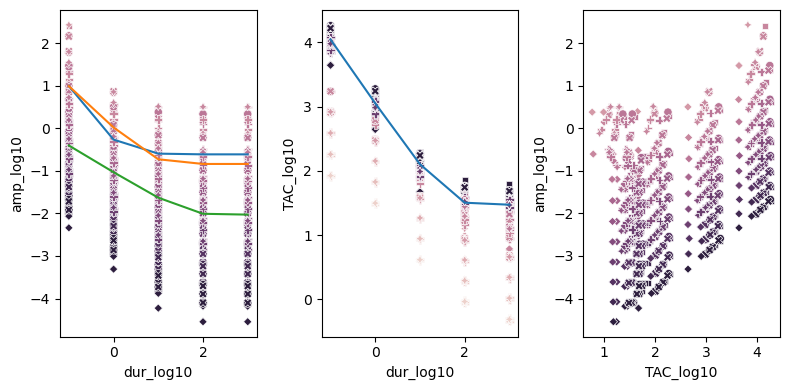

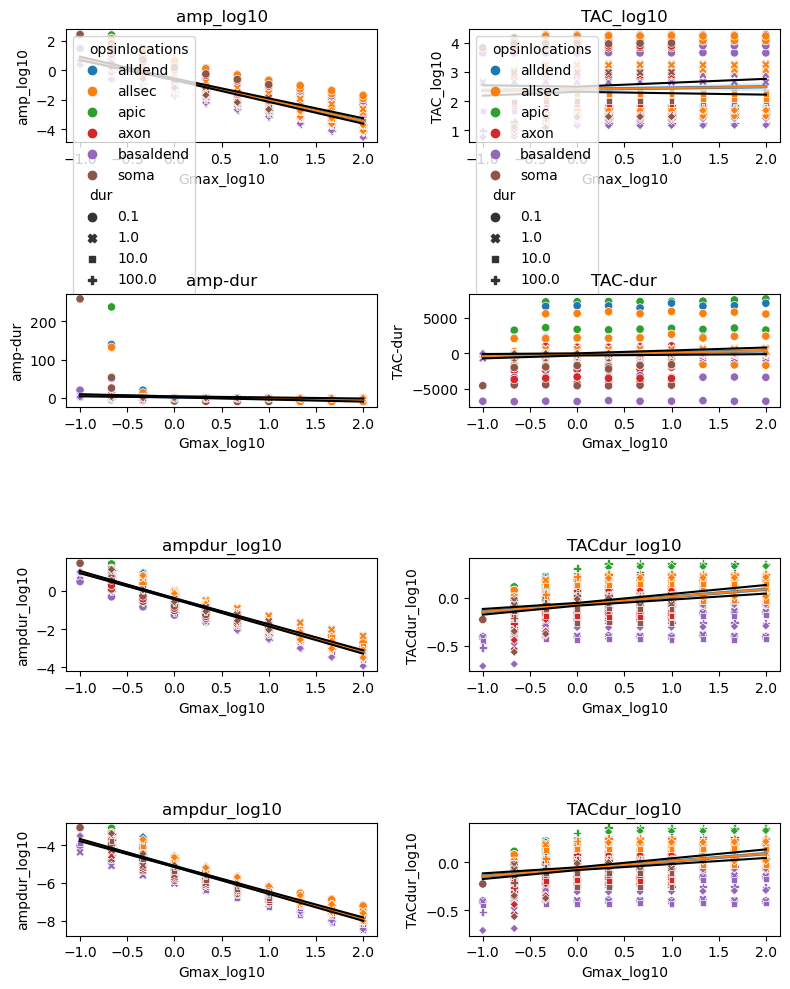

In [14]:
Hill_Lap = lambda pd,I0,tau: I0/(1-np.exp(-pd/tau))
vHill_Lap = np.vectorize(Hill_Lap)
power_ampTAC = lambda TAC,a,b,c: a*TAC**b+c
vpower_ampTAC = np.vectorize(power_ampTAC)

# xdata = master_df['dur'].to_numpy()
# ydata_TAC = master_df['TAC'].to_numpy()
# ydata_amp = master_df['amp'].to_numpy()
# idx = ~(np.isnan(xdata) | np.isnan(ydata_TAC) |np.isinf(ydata_TAC) | np.isnan(ydata_amp) | np.isinf(ydata_amp))
# xdata = xdata[idx]; ydata_TAC = ydata_TAC[idx]; ydata_amp = ydata_amp[idx]
# popt_TAC, _ = optimize.curve_fit(Hill_Lap,xdata,ydata_TAC,p0=[np.min(ydata_TAC),1])
# popt_amp_power, _ = optimize.curve_fit(power_ampTAC,ydata_TAC,ydata_amp,p0=[1,1,1],bounds=(0,np.inf))
# popt_amp_hl, _ = optimize.curve_fit(Hill_Lap,xdata,ydata_amp,p0=[np.min(ydata_amp),1])
popt_TAC_hl, popt_amp_power, popt_amp_hl, popt_amp_loglog, r2_TAC, r2_amp_power, r2_amp_hl, r2_amp_loglog = durfit(master_df)
print(popt_TAC_hl)
print(popt_amp_power)

fig,axs = plt.subplots(1,3,tight_layout = True,figsize=(8,4))
sns.scatterplot(data=master_df,x='dur_log10',y='amp_log10',hue='Gmax_log10',style='opsinlocations', ax=axs[0])
sns.scatterplot(data=master_df,x='dur_log10',y='TAC_log10', ax=axs[1],hue='Gmax_log10',style='opsinlocations')
sns.scatterplot(data=master_df,x='TAC_log10',y='amp_log10', ax=axs[2],hue='Gmax_log10',style='opsinlocations')
xvals = unique_values_columns_master['dur']
yvals = vHill_Lap(xvals,*popt_TAC_hl)
yvals_amp = vpower_ampTAC(yvals,*popt_amp_power)
yvals_amp_hl = vHill_Lap(xvals, *popt_amp_hl)
yvals_amp_loglog = popt_amp_loglog[0]*np.log10(yvals)+popt_amp_loglog[1]
print(yvals_amp)
axs[0].plot(np.log10(xvals),np.log10(yvals_amp))
axs[0].plot(np.log10(xvals),np.log10(yvals_amp_hl))
axs[0].plot(np.log10(xvals),yvals_amp_loglog)
axs[1].plot(np.log10(xvals),np.log10(yvals))
axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].get_legend().remove()


ress_dict = {'amp_log10':{},'TAC_log10':{}}
fig,axs = plt.subplots(4,2,tight_layout = True,figsize=(8,10))
filteronthreshold = True
ress = linearReg(master_df,['amp_log10','TAC_log10'],axs[0,:],filteronthreshold)
master_df['amp-dur'] = master_df['amp']-vpower_ampTAC(vHill_Lap(master_df['dur'],*popt_TAC_hl),*popt_amp_power)
master_df['TAC-dur'] = master_df['TAC']-vHill_Lap(master_df['dur'],*popt_TAC_hl)
ress = linearReg(master_df,['amp-dur','TAC-dur'],axs[1,:],filteronthreshold)
master_df['ampdur_log10'] = np.log10(master_df['amp']/vpower_ampTAC(vHill_Lap(master_df['dur'],*popt_TAC_hl),*popt_amp_power))
master_df['TACdur_log10'] = np.log10(master_df['TAC']/vHill_Lap(master_df['dur'],*popt_TAC_hl))
ress = linearReg(master_df,['ampdur_log10','TACdur_log10'],axs[2,:],filteronthreshold)
master_df['ampdur_log10'] = master_df['amp_log10']-popt_amp_loglog[0]*np.log10(vHill_Lap(master_df['dur'],*popt_TAC_hl))+popt_amp_loglog[1]
master_df['TACdur_log10'] = np.log10(master_df['TAC']/vHill_Lap(master_df['dur'],*popt_TAC_hl))
ress = linearReg(master_df,['ampdur_log10','TACdur_log10'],axs[3,:],filteronthreshold)
for ax in axs.ravel()[2:]:
    ax.get_legend().remove()


In [15]:

single_linear_model = smf.ols(formula='ampdur_log10 ~ Gmax_log10', data=master_df).fit()
summary = single_linear_model.summary2()
print('summary multi linear mdoel')
print(summary)

multi_linear_model = smf.ols(formula='ampdur_log10 ~ Gmax_log10 + C(opsinlocations) + C(neurontemplate)', data=master_df).fit()
summary = multi_linear_model.summary2()
print('summary multi linear mdoel')
print(summary)

model_interaction_gdur = smf.ols(formula='ampdur_log10 ~ Gmax_log10 + C(opsinlocations) + C(neurontemplate) + Gmax_log10:dur_log10', data=master_df).fit()
summary = model_interaction_gdur.summary2()
print('\n\nsummary multi linear model with gmax_log10 - dur_log10 interaction')
print(summary)
print('gmax_log10:dur_log10 interaction: ', model_interaction_gdur.rsquared_adj)
print(anova_lm(multi_linear_model,model_interaction_gdur))

model_interaction_gol = smf.ols(formula='ampdur_log10 ~ Gmax_log10 + C(opsinlocations) + C(neurontemplate) +  Gmax_log10:C(opsinlocations)', data=master_df).fit()
print('\n\nsummary multi linear model with gmax_log10 - opsinlocation interaction')
print(model_interaction_gol.summary2())
print('\n anova: multi lin model vs additional Gmax-opsinlocation interaction')
print(anova_lm(multi_linear_model,model_interaction_gol))

model_interaction_gnt = smf.ols(formula='ampdur_log10 ~ Gmax_log10 + C(opsinlocations) + C(neurontemplate) +  Gmax_log10:C(neurontemplate)', data=master_df).fit()
print('\n\nsummary multi linear model with gmax_log10 - neurontemplate interaction')
print(model_interaction_gnt.summary2())
print('\n anova: multi lin model vs additional Gmax-neurontemplate interaction')
print(anova_lm(multi_linear_model,model_interaction_gnt))

model_interaction_olnt = smf.ols(formula='ampdur_log10 ~ Gmax_log10  +  C(neurontemplate):C(opsinlocations)', data=master_df).fit()
print('\n\nsummary multi linear model with opsinlocations - neurontemplate interaction')
print(model_interaction_olnt.summary2())
print('\n anova: multi lin model vs additional Gmax-neurontemplate interaction')
print(anova_lm(multi_linear_model,model_interaction_olnt))

model_interaction_olnt_gol = smf.ols(formula='ampdur_log10 ~ Gmax_log10  +  C(neurontemplate):C(opsinlocations) + Gmax_log10:C(opsinlocations)', data=master_df).fit()
print('\n\nsummary multi linear model with opsinlocations - neurontemplate interaction')
print(model_interaction_olnt_gol.summary2())
print('\n anova: multi lin model vs additional Gmax-neurontemplate interaction')
print(anova_lm(model_interaction_olnt,model_interaction_olnt_gol))

model_interaction_olnt_golnt = smf.ols(formula='ampdur_log10 ~ Gmax_log10  +  C(neurontemplate):C(opsinlocations) + Gmax_log10:(C(neurontemplate):C(opsinlocations))', data=master_df).fit()
print('\n\nsummary multi linear model with opsinlocations - neurontemplate interaction')
print(model_interaction_olnt_golnt.summary2())
print('\n anova: multi lin model vs additional Gmax-neurontemplate interaction')
print(anova_lm(model_interaction_olnt,model_interaction_olnt_golnt))


summary multi linear mdoel
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.918   
Dependent Variable: ampdur_log10     AIC:                468.9805
Date:               2023-02-15 17:49 BIC:                478.2073
No. Observations:   745              Log-Likelihood:     -232.49 
Df Model:           1                F-statistic:        8375.   
Df Residuals:       743              Prob (F-statistic): 0.00    
R-squared:          0.919            Scale:              0.10959 
------------------------------------------------------------------
             Coef.   Std.Err.      t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept   -5.1277    0.0149  -344.8880  0.0000  -5.1568  -5.0985
Gmax_log10  -1.3915    0.0152   -91.5140  0.0000  -1.4214  -1.3617
-----------------------------------------------------------------
Omnibus:              15.071       Durbin-Watson:          0.

0.9365655265557179 0.8637714349805463 0.05143091930355692 0.05504639162403546 0.22367092465440752
[29.67385213 37.49061563] [7.16462999e-06 1.51367258e+00 2.42480558e-01] [0.14499174 6.68308032] [0.6306462927907683, -2.9573125251129335] Intercept     0.786973
Gmax_log10   -1.391537
dtype: float64
0.9378369724820705 0.8637714349805463 0.05143091930355692 0.05504639162403546 0.22367092465440752
[29.67385213 37.49061563] [7.16462999e-06 1.51367258e+00 2.42480558e-01] [0.14499174 6.68308032] [0.6306462927907683, -2.9573125251129335] Intercept    -0.415128
Gmax_log10   -1.391252
dtype: float64


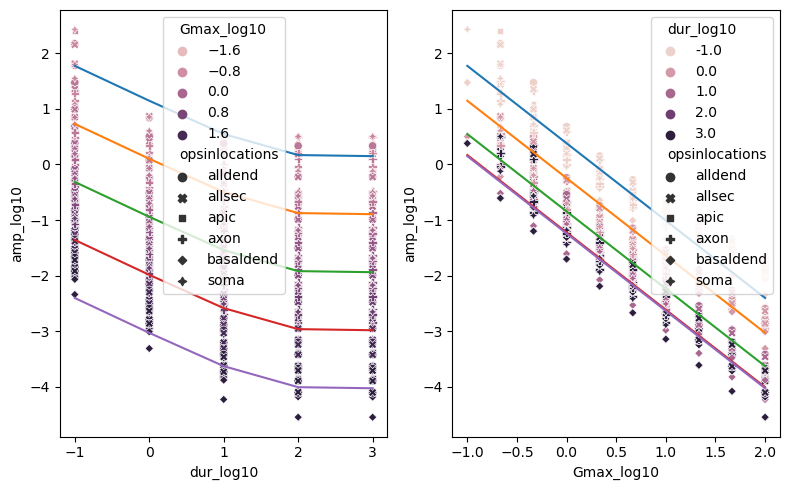

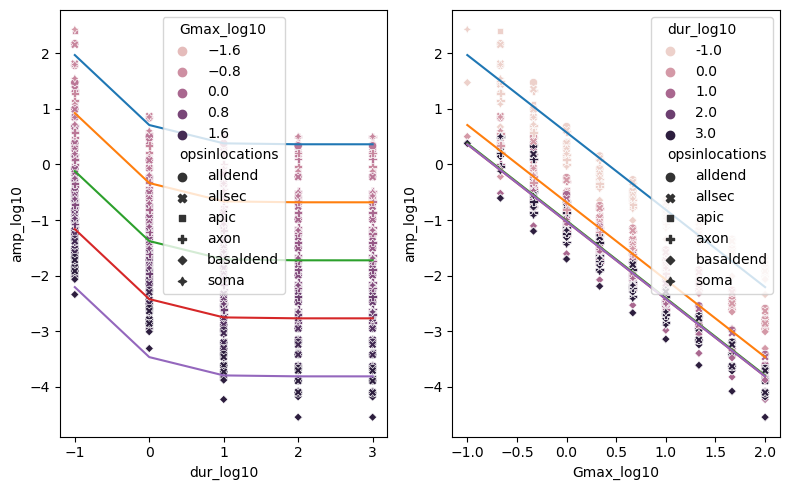

In [16]:
vmymodel, r2_tot, single_linear_model, popt_TAC_hl, popt_amp_power, popt_amp_hl, popt_amp_loglog, r2_TAC, r2_amp_power, r2_amp_hl, r2_amp_loglog = Gmaxfitafterdurfit(master_df,usedur='loglog')
fig,axs = plt.subplots(1,2,tight_layout = True,figsize=(8,5))
sns.scatterplot(data=master_df,x='dur_log10',y='amp_log10',hue='Gmax_log10',style='opsinlocations', ax=axs[0])
xdata_dur= np.logspace(-1,3,5)
xdata_gmax = np.logspace(-1,2,5)
for x in xdata_gmax:
    axs[0].plot(np.log10(xdata_dur), vmymodel(xdata_dur,x))
sns.scatterplot(data=master_df,x='Gmax_log10',y='amp_log10',hue='dur_log10',style='opsinlocations', ax=axs[1])
for x in xdata_dur:
    axs[1].plot(np.log10(xdata_gmax), vmymodel(x,xdata_gmax))
print(r2_tot, r2_TAC, r2_amp_power, r2_amp_hl, r2_amp_loglog)
print(popt_TAC_hl, popt_amp_power, popt_amp_hl, popt_amp_loglog,single_linear_model.params)

vmymodel, r2_tot, single_linear_model, popt_TAC_hl, popt_amp_power, popt_amp_hl, popt_amp_loglog, r2_TAC, r2_amp_power, r2_amp_hl, r2_amp_loglog = Gmaxfitafterdurfit(master_df,usedur='power')
fig,axs = plt.subplots(1,2,tight_layout = True,figsize=(8,5))
sns.scatterplot(data=master_df,x='dur_log10',y='amp_log10',hue='Gmax_log10',style='opsinlocations', ax=axs[0])
xdata_dur= np.logspace(-1,3,5)
xdata_gmax = np.logspace(-1,2,5)
for x in xdata_gmax:
    axs[0].plot(np.log10(xdata_dur), vmymodel(xdata_dur,x))
sns.scatterplot(data=master_df,x='Gmax_log10',y='amp_log10',hue='dur_log10',style='opsinlocations', ax=axs[1])
for x in xdata_dur:
    axs[1].plot(np.log10(xdata_gmax), vmymodel(x,xdata_gmax))
print(r2_tot, r2_TAC, r2_amp_power, r2_amp_hl, r2_amp_loglog)
print(popt_TAC_hl, popt_amp_power, popt_amp_hl, popt_amp_loglog,single_linear_model.params)

## Collect model fits for each neurontemplate and opsin combination

Irheo     tchron            pa         pb         pc     rico_g  \
count  20.000000  20.000000  2.000000e+01  20.000000  20.000000  20.000000   
mean   29.469872  37.454360  2.234983e-04   1.457275   0.242639  -1.485211   
std    10.403721   4.098747  5.191033e-04   0.413969   0.181506   0.097655   
min    13.371655  32.997833  1.725825e-08   0.945469   0.000021  -1.650957   
25%    22.216615  33.848738  6.296006e-06   1.238394   0.101000  -1.551459   
50%    26.053424  36.215818  1.640419e-05   1.354305   0.246419  -1.448211   
75%    39.585327  40.706201  3.853309e-05   1.485148   0.308182  -1.410432   
max    54.451647  45.150982  1.826928e-03   2.302391   0.598464  -1.368695   

               c   slopeamp       camp     r2_tot     r2_TAC  r2_amp_power  \
count  20.000000  20.000000  20.000000  20.000000  20.000000     20.000000   
mean    0.755796   0.624506  -2.867844   0.960116   0.999795      0.030830   
std     0.397520   0.095533   0.547529   0.010516   0.000147      0.023348   
min     0.200950   0.482413  -3.658696   0.940820   0.999337     -0.006430   
25%     0.274935   0.550600  -3.222346   0.951745   0.999752      0.016724   
50%     0.938872   0.607015  -2.998277   0.963129   0.999851      0.031058   
75%     1.122445   0.711563  -2.338075   0.966828   0.999899      0.037543   
max     1.226085   0.789580  -2.003862   0.974803   0.999943      0.080737   

       r2_amp_hl  r2_amp_loglog      pa1e3  
count  20.000000      20.000000  20.000000  
mean    0.116538       0.185882   0.223498  
std     0.034747       0.070747   0.519103  
min     0.076086       0.109060   0.000017  
25%     0.090448       0.129891   0.006296  
50%     0.107102       0.146446   0.016404  
75%     0.139123       0.231462   0.038533  
max     0.200528       0.360841   1.826928

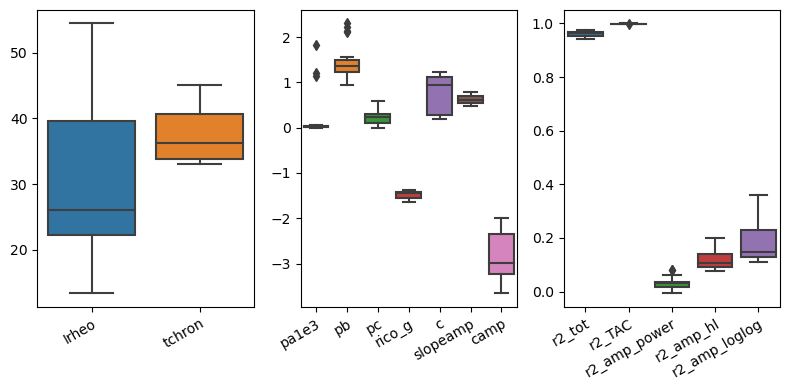

In [17]:
master_df['nt_ol'] = master_df['neurontemplate']+master_df['opsinlocations']
ukeys = master_df['nt_ol'].unique()
myfits_info_dict = {}
mymodels = {}
idx = -1
for nt_ol in ukeys:

    idx+=1
    intm_df = master_df[master_df['nt_ol']==nt_ol].copy()
    try:
        vmymodel, r2_tot, single_linear_model, popt_TAC_hl, popt_amp_power, popt_amp_hl, popt_amp_loglog, r2_TAC, r2_amp_power, r2_amp_hl, r2_amp_loglog = Gmaxfitafterdurfit(intm_df,usedur='loglog')
        fit_info = {'Irheo':popt_TAC_hl[0], 'tchron': popt_TAC_hl[1], 'pa':popt_amp_power[0], 'pb':popt_amp_power[1], 'pc':popt_amp_power[2], 'rico_g':single_linear_model.params['Gmax_log10'], 'c':single_linear_model.params['Intercept'], 'slopeamp':popt_amp_loglog[0], 'camp': popt_amp_loglog[1], 'r2_tot':r2_tot,  'r2_TAC':r2_TAC, 'r2_amp_power':r2_amp_power, 'r2_amp_hl':r2_amp_hl,'r2_amp_loglog':r2_amp_loglog, 'neurontemplate':intm_df['neurontemplate'].iloc[0], 'opsinlocation':intm_df['opsinlocations'].iloc[0]}
        myfits_info_dict[idx] = fit_info
        mymodels[nt_ol] ={'model':vmymodel, 'statsmodel':single_linear_model, 'neurontemplate':intm_df['neurontemplate'].iloc[0], 'opsinlocation':intm_df['opsinlocations'].iloc[0]}
    except:
        print(f"error for fit of {nt_ol}")
models_df = pd.DataFrame.from_dict(myfits_info_dict, orient='index')
models_df['pa1e3'] = models_df['pa']*1000
fig,axs = plt.subplots(1,3,tight_layout = True, figsize = (8,4))
sns.boxplot(models_df[['Irheo','tchron']],ax=axs[0])
plt.setp(axs[0].get_xticklabels(), rotation=30, ha="right",
             rotation_mode="anchor")
sns.boxplot(models_df[['pa1e3','pb','pc','rico_g','c','slopeamp','camp']],ax=axs[1])
plt.setp(axs[1].get_xticklabels(), rotation=30, ha="right",
             rotation_mode="anchor")
sns.boxplot(models_df[[x for x in models_df.columns if 'r2' in x ]],ax=axs[2])
plt.setp(axs[2].get_xticklabels(), rotation=30, ha="right",
             rotation_mode="anchor")
models_df[[x for x in models_df.columns if not '_mu' in x]].describe()

# Impedance

In [2]:
from Model import Cells
from neuron import h
h.nrn_load_dll("./Model/Mods/nrnmech.dll")
print("succes load nrnmech.dll")
neurontemplate = Cells.NeuronTemplates[0]
print(f'Loading cell: {neurontemplate}')
cell = getattr(Cells, neurontemplate)(replace_axon=False)
#cell2 = getattr(Cells, NeuronTemplates[1])(replace_axon=False)
print(f'\t* celltype: {cell.celltype}\n\t* morphology: {cell.morphology}')

# cell.insertOptogenetics(cell.alldend)
cell.rotate_Cell(theta=-np.pi/2)
# cell2.rotate_Cell(theta=-np.pi/2)
#cell2.move_Cell([0, 100, 0])


succes load nrnmech.dll
Loading cell: CA1_PC_cAC_sig5
not replacing axon
	* celltype: SP_PC
	* morphology: mpg141208_B_idA


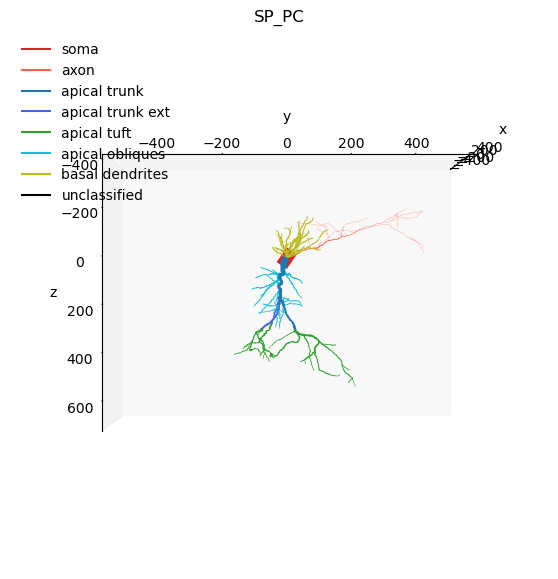

In [6]:

# section Plot
fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(111, projection='3d')
ax = cell.sec_plot(ax)
#ax = cell2.sec_plot(ax)
ax.set_title(cell.celltype)
ax.set_zlim([-400, 700])
ax.set_xlim([-500, 500])
ax.set_ylim([-550, 550])
ax.invert_zaxis()
ax.view_init(elev=0, azim=0)

In [18]:
import Functions.globalFunctions.morphology_v2 as mphv2
%matplotlib widget

In [7]:

imp_df = pd.read_csv('./Results/impedance_CA1_PC_cAC_sig5.csv',index_col=0)
imp_df



imp    f  v0  durinit   neurontemplate            seg
0      50.842029    0 -70      100  CA1_PC_cAC_sig5   soma[0](0.5)
1      50.798990    1 -70      100  CA1_PC_cAC_sig5   soma[0](0.5)
2      47.071933   10 -70      100  CA1_PC_cAC_sig5   soma[0](0.5)
3      15.756119  100 -70      100  CA1_PC_cAC_sig5   soma[0](0.5)
4      52.687757    0 -70      100  CA1_PC_cAC_sig5   axon[0](0.1)
...          ...  ...  ..      ...              ...            ...
2167  644.364864  100 -70      100  CA1_PC_cAC_sig5  apic[87](0.5)
2168  914.534389    0 -70      100  CA1_PC_cAC_sig5  apic[88](0.5)
2169  914.433616    1 -70      100  CA1_PC_cAC_sig5  apic[88](0.5)
2170  904.860434   10 -70      100  CA1_PC_cAC_sig5  apic[88](0.5)
2171  583.727128  100 -70      100  CA1_PC_cAC_sig5  apic[88](0.5)

[2172 rows x 6 columns]

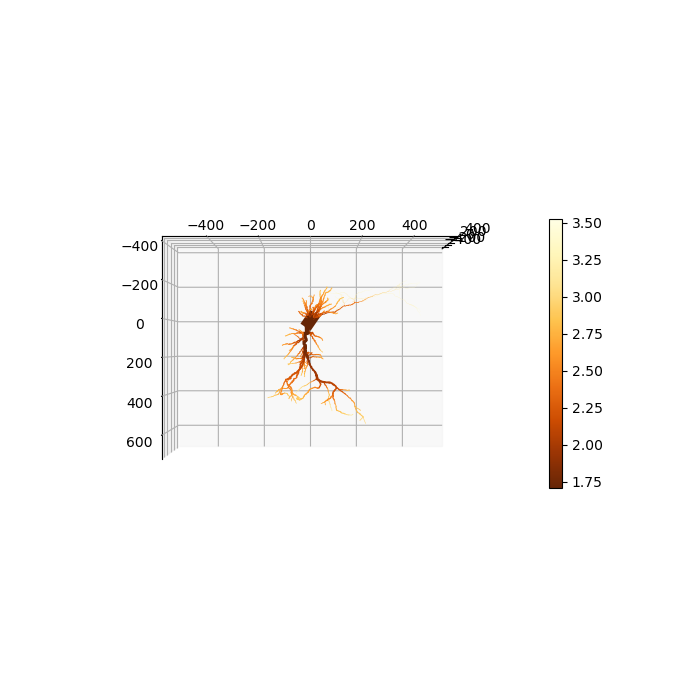

In [20]:
fig = plt.figure(figsize=(7,7))
ax = plt.subplot(111, projection='3d')
cvals = np.array(imp_df[imp_df['f']==0]['imp'])
mphv2.shapeplot(h, ax, sections=cell.allsec, cvals=cvals, cvals_type=None,
              clim=None, cmap='YlOrBr_r', cb_flag=True, colorscale='log10', fontSize=12, legend=True, cbax=None)
ax.set_zlim([-400, 700])
ax.set_xlim([-500, 500])
ax.set_ylim([-550, 550])
ax.invert_zaxis()
ax.view_init(elev=0, azim=0)

# Estimate VTA surfaces

In [18]:
def estim_surfvta(dur,Gmax,model,intensity,field_axialsymm,dr,dz):
    target_amp_log10 = model(dur,Gmax)
    target_amp = 10**target_amp_log10

    myfield = intensity*field_axialsymm
    above_target = myfield>=target_amp
    surf = np.sum(above_target.ravel()*dr*dz)

    return surf
#load optic field
fieldFilePath = "Inputs/LightIntensityProfile/Ugent470nIrr_np1e7_res5emin3_gf1_cyl_5x10.txt"
opticField = np.genfromtxt(fieldFilePath, comments='%')
dr = np.diff(np.unique(opticField[:,0])[:2])/1000 #/1000 um->mm
dz = np.diff(np.unique(opticField[:,1])[:2])/1000 #/1000 um->mm
print(dr,dz)


[0.005] [0.005]


In [19]:
#load effective vta surfaces
filepath_vta = './Results\SDC\SDC_singlePulse_Ugent470_gray_invivo_multicell'
vta_filename = 'vta_logspace(-1,3,9).csv'
vta_df =  pd.read_csv(os.path.join(filepath_vta, vta_filename), index_col=0)
vta_df_original = vta_df.copy()
vta_df.head()
for x in ['Gmax','dur','level','theta_0']:
    vta_df[x] = np.round(vta_df[x],2)

for x in ['vta_low','vta_up','surf_low','surf_up','dur','Gmax','level']:
    vta_df[x+'_log10'] = np.round(np.log10(vta_df[x]),4)
vta_df['neurontemplate'].unique()

vta_df['neurontemplate'] = vta_df['neurontemplate'].replace({'CA1_PC_cAC_sig5':'pyr_1', 'CA1_PC_cAC_sig6':'pyr_2', 'cNACnoljp1':'bc_1', 'cNACnoljp2':'bc_2'})
vta_df[['celltype','number']] = vta_df['neurontemplate'].str.split('_',expand=True)
vta_columns=vta_df.columns


unique_values_columns_vta = {key: vta_df[key].unique() for key in vta_columns}
for x in ['vta_low','vta_up','surf_low','surf_up','dur','Gmax','level']:
    unique_values_columns_vta[x] = np.sort(unique_values_columns_vta[x])
    unique_values_columns_vta[x+'_log10'] = np.sort(unique_values_columns_vta[x+'_log10'])

for theta in unique_values_columns_vta['theta_0']:
    if theta!=0:
        label = 'z'
    else:
        label = 'x'
    vta_df.loc[vta_df['theta_0']==theta,label+'_0']*=-1
for x in ['b_opt_pos','b_opt_pos_TAC', 'w_opt_pos_TAC']:
    vta_df[x]*=-1000




c:\Users\rschoete\miniconda\envs\Optogx_analysis\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\rschoete\miniconda\envs\Optogx_analysis\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\rschoete\miniconda\envs\Optogx_analysis\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\rschoete\miniconda\envs\Optogx_analysis\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
# determine estim vta surfaces
estim_surfaces = []
estim_surfaces2 = []
for i in range(len(vta_df)):
    if i%3000 ==0:
        print(i)
    pitch = vta_df['theta_0'].iloc[i]
    intensity = vta_df['level'].iloc[i]
    Gmax = vta_df['Gmax'].iloc[i]
    dur = vta_df['dur'].iloc[i]
    nt = vta_df['neurontemplate'].iloc[i]
    ol = vta_df['opsinlocations'].iloc[i]
    nt_ol = nt+ol
    model = mymodels[nt_ol]['model']
    #first method
    if pitch != 0:
        # neuron moved over a range of 1100um
        # in real model soma was estimated to be located at 400um -> depending on pitch moved from -400->700 or -700-400
        # not to favor in estimation => shrink neuron to be located at centre of 1100um => move from -550->550um
        idx_field = (opticField[:,1]>=-550) & (opticField[:,1]<=550) & (opticField[:,0]<=2500)
    else:
        #for 550 in radial direction same reasoning as above
        idx_field = (opticField[:,1]>=-1000) & (opticField[:,1]<=5000) & (opticField[:,0]<=550)

    estim_surface = estim_surfvta(dur,Gmax,model,intensity,opticField[idx_field,-1],dr,dz)
    if pitch == 0:
        estim_surface*=2
    # estim_surfaces[idx] = {'surf_estim':estim_surface, 'dur':dur, 'Gmax':Gmax, 'level': intensity, 'neurontemplate':nt, 'opsinlocations':ol, 'theta_0': pitch }
    estim_surfaces.append(estim_surface)

    # second method
    if pitch <0:
        idx_field = (opticField[:,1]>=-700) & (opticField[:,1]<=400) & (opticField[:,0]<=2500)
        estim_surface = estim_surfvta(dur,Gmax,model,intensity,opticField[idx_field,-1],dr,dz)
    elif pitch > 0:
        idx_field = (opticField[:,1]>=-400) & (opticField[:,1]<=700) & (opticField[:,0]<=2500)
        estim_surface = estim_surfvta(dur,Gmax,model,intensity,opticField[idx_field,-1],dr,dz)
    else:
        #for 550 in radial direction same reasoning as above
        idx_field = (opticField[:,1]>=-1000) & (opticField[:,1]<=5000) & (opticField[:,0]<=700)
        field = opticField[idx_field,-1]
        idx_field = (opticField[:,1]>=-1000) & (opticField[:,1]<=5000) & (opticField[:,0]<=400)
        field = np.concatenate((field,opticField[idx_field,-1]))
        estim_surface = estim_surfvta(dur,Gmax,model,intensity,field,dr,dz)
    # estim_surfaces[idx] = {'surf_estim':estim_surface, 'dur':dur, 'Gmax':Gmax, 'level': intensity, 'neurontemplate':nt, 'opsinlocations':ol, 'theta_0': pitch }
    estim_surfaces2.append(estim_surface)


vta_df['surf_estim'] = estim_surfaces
vta_df['surf_estim2'] = estim_surfaces2
vta_df[['surf_low','surf_up', 'surf_estim','surf_estim2']]


0
3000
6000
9000
12000
15000


surf_low  surf_up  surf_estim  surf_estim2
0           NaN      NaN     0.00000     0.000000
1           NaN      NaN     0.00000     0.000000
2           NaN      NaN     0.00000     0.000000
3           NaN      NaN     0.00000     0.000000
4           NaN      NaN     0.00000     0.000000
...         ...      ...         ...          ...
15115       NaN      NaN     0.14915     0.149150
15116       NaN      NaN     0.33200     0.332000
15117       NaN      NaN     0.83735     0.816225
15118       NaN      NaN     1.73800     1.687975
15119       NaN      NaN     2.74320     2.719925

[15120 rows x 4 columns]

(0.9430086112334429, 0.0)

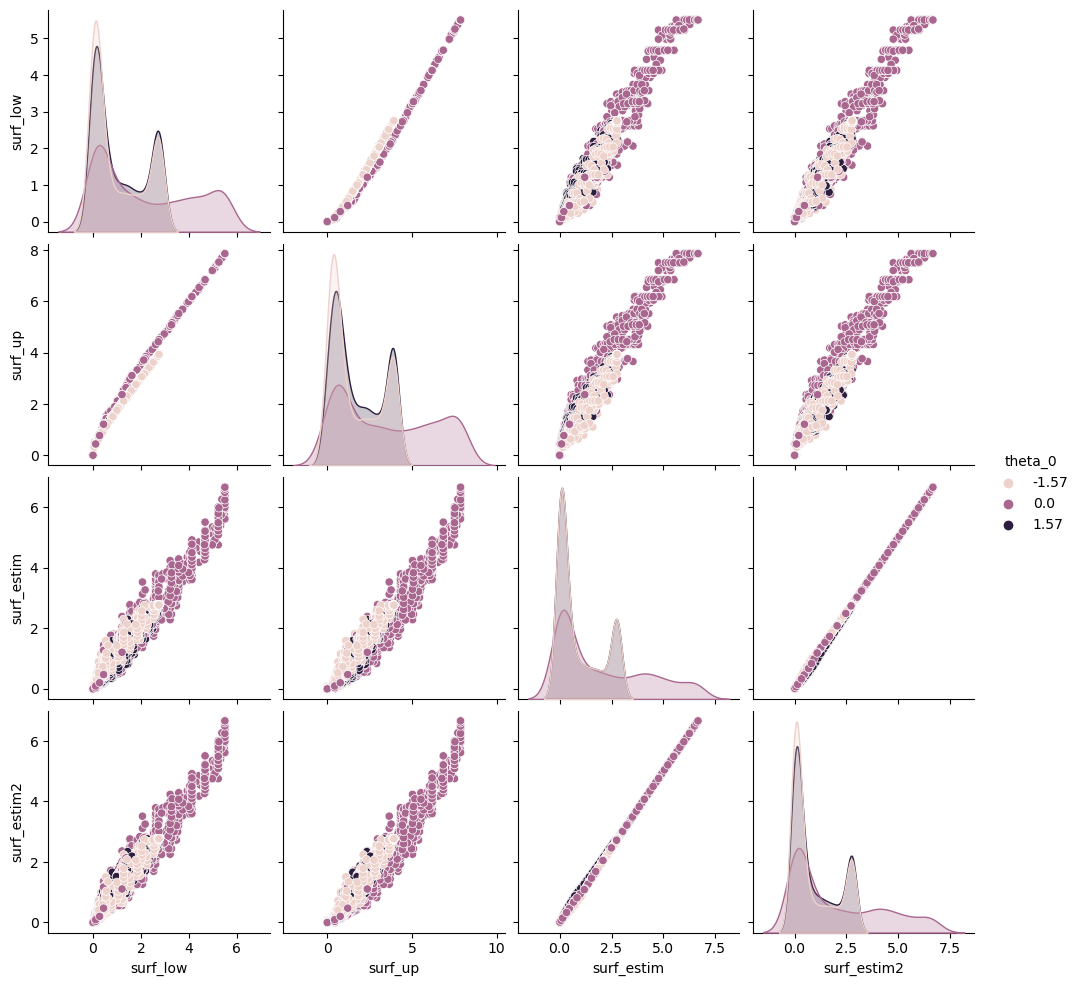

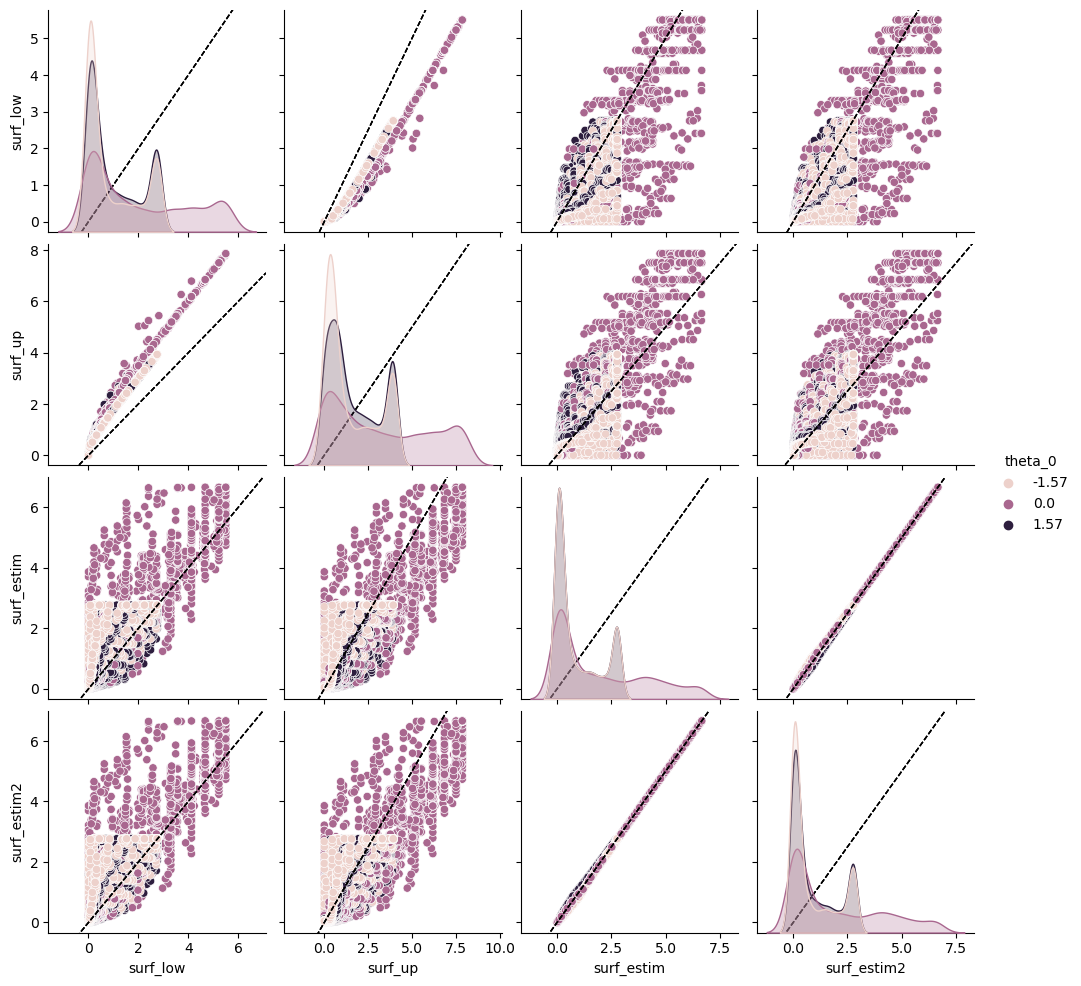

In [22]:
idx = vta_df['opsinlocations']=='soma'
g = sns.pairplot(vta_df[['surf_low','surf_up', 'surf_estim', 'surf_estim2','opsinlocations','neurontemplate','theta_0']][idx],hue='theta_0')
def modify_plot(*args, **kwargs):
  if "ax" in kwargs:
    ax = kwargs['ax']
  else:
    ax = plt.gca()
  xpoints = ypoints = ax.get_xlim()
  ax.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False)

idx = vta_df['opsinlocations']!='soma'
g = sns.pairplot(vta_df[['surf_low','surf_up', 'surf_estim', 'surf_estim2','opsinlocations','neurontemplate','theta_0']][idx],hue='theta_0')
def modify_plot(*args, **kwargs):
  if "ax" in kwargs:
    ax = kwargs['ax']
  else:
    ax = plt.gca()
  xpoints = ypoints = ax.get_xlim()
  ax.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False)

g.map(modify_plot)
x = vta_df['surf_low'].to_numpy()
y = vta_df['surf_estim2'].to_numpy()
idx = ~ (np.isnan(x) |  np.isinf(x) | np.isnan(y) | np.isinf(y))
stats.pearsonr(x[idx],y[idx])

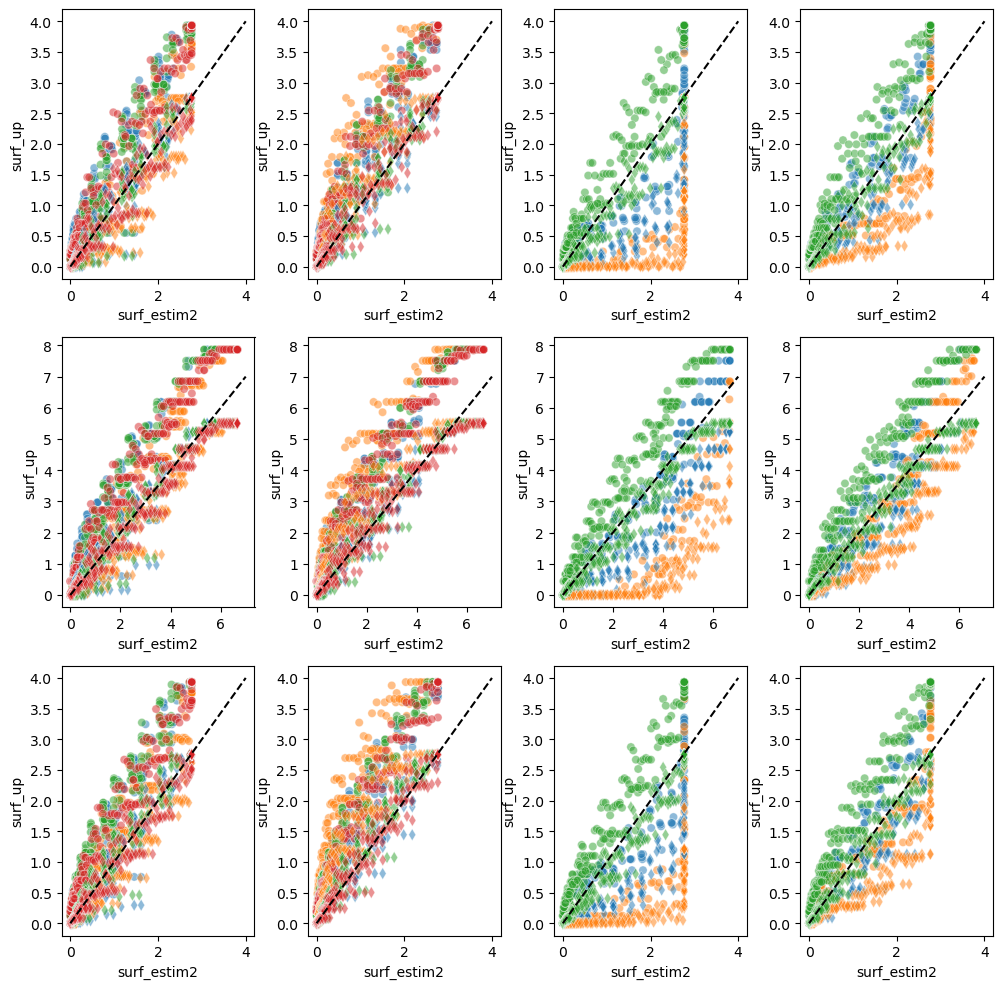

In [23]:
nts = unique_values_columns_vta['neurontemplate']
pitchs = unique_values_columns_vta['theta_0']
fig,axs = plt.subplots(len(pitchs),len(nts),tight_layout = True,figsize=(10,10))
for pitch,ax in zip(pitchs,axs):
    xmax = 4
    if pitch==0:
        xmax = 7
    for nt,iax in zip(nts,ax):
        idx = (vta_df['neurontemplate']==nt) & (vta_df['theta_0'] == pitch)
        intm_df = vta_df[idx]
        sns.scatterplot(intm_df, x='surf_estim2', y='surf_up',hue='opsinlocations',ax=iax,alpha=0.5)
        sns.scatterplot(intm_df, x='surf_estim2', y='surf_low',hue='opsinlocations',marker='d',ax=iax,alpha=0.5)

        iax.plot([0,xmax],[0,xmax],'k--')
        iax.get_legend().remove()


# Extra plots

In [ ]:

ress_dict['amp_log10']['all'] = ress[0]
ress_dict['TAC_log10']['all'] = ress[1]
for cell in unique_values_columns_master['neurontemplate']:
    intm_df = master_df[master_df['neurontemplate']==cell]
    fig,axs = plt.subplots(1,2,tight_layout = True,figsize=(8,5))
    print('\n\n',cell)
    ress = linearReg(intm_df,['amp_log10','TAC_log10'],axs,filteronthreshold)
    fig.suptitle(cell)
    ress_dict['amp_log10'][cell] = ress[0]
    ress_dict['TAC_log10'][cell] = ress[1]




In [ ]:

plot_flag = False
for clas,label in zip(['opsinlocations','dur'],['oL','dur']):
    if plot_flag:
        fig,axs = plt.subplots(1,2,tight_layout = True,figsize=(8,5))
    filteronthreshold = True
    intm_df = master_df.copy()
    for dur in unique_values_columns_master[clas]:
        for feat in features:
            idx = intm_df[clas]==dur
            intm_df[feat].loc[idx] = (intm_df[feat][idx]-np.mean(intm_df[feat][idx]))/np.std(intm_df[feat][idx])
    ress = linearReg(intm_df,['amp_log10','TAC_log10'],axs,filteronthreshold,plot_flag=plot_flag)
    ress_dict['amp_log10']['all_norm'+label] = ress[0]
    ress_dict['TAC_log10']['all_norm'+label] = ress[1]
    for cell in unique_values_columns_master['neurontemplate']:
        intm2_df = intm_df[intm_df['neurontemplate']==cell]
        if plot_flag:
            fig,axs = plt.subplots(1,2,tight_layout = True,figsize=(8,5))
        print('\n\n',cell)
        ress = linearReg(intm2_df,['amp_log10','TAC_log10'],axs,True,plot_flag=plot_flag)
        fig.suptitle(cell)
        ress_dict['amp_log10'][cell+'_norm'+label] = ress[0]
        ress_dict['TAC_log10'][cell+'_norm'+label] = ress[1]

init_df = True
for mk in ress_dict.keys():
    for k in ress_dict[mk]:
        if init_df:
            index = pd.MultiIndex.from_tuples([(mk,k)], names=["feat", "template"])
            df = pd.DataFrame(ress_dict[mk][k],index=index)
            init_df=False
        else:
            index = pd.MultiIndex.from_tuples([(mk,k)], names=["feat", "template"])
            df = pd.concat((df,pd.DataFrame(ress_dict[mk][k],index=index)),axis=0)

df.sort_index()
df.reset_index()

In [ ]:
model_interaction_gdur_gol = smf.ols(formula='amp_log10 ~ dur_log10 + Gmax_log10 + C(opsinlocations) + C(neurontemplate) + Gmax_log10:dur_log10 + Gmax_log10:C(opsinlocations)', data=master_df).fit()
print('\n anova: multi lin model with gMax-dur interaction vs additional Gmax-opsinlocation interaction')
print(anova_lm(model_interaction_gdur,model_interaction_gdur_gol))
#odel_interaction_gdur_gol.summary()
print('From summary investigation only interaction when opsinlocation is soma')
print('\n\n anova: multi lin model with gMax-dur interaction vs additional Gmax-neurontemplate interaction')
model_interaction_gdur_gnt = smf.ols(formula='amp_log10 ~ dur_log10 + Gmax_log10 + C(opsinlocations) + C(neurontemplate) + Gmax_log10:dur_log10 + Gmax_log10:C(neurontemplate)', data=master_df).fit()
print(anova_lm(model_interaction_gdur,model_interaction_gdur_gnt))

print('\n\n anova: multi lin model with gMax-dur interaction vs additional dur-neurontemplate interaction')
model_interaction_gdur_dnt = smf.ols(formula='amp_log10 ~ dur_log10 + Gmax_log10 + C(opsinlocations) + C(neurontemplate) + Gmax_log10:dur_log10 + dur_log10:C(neurontemplate)', data=master_df).fit()
print(anova_lm(model_interaction_gdur,model_interaction_gdur_dnt))

print('\n\n anova: multi lin model with gMax-dur interaction vs additional dur-opsinlocation interaction')
model_interaction_gdur_dol = smf.ols(formula='amp_log10 ~ dur_log10 + Gmax_log10 + C(opsinlocations) + C(neurontemplate) + Gmax_log10:dur_log10 + dur_log10:C(opsinlocations)', data=master_df).fit()
print(anova_lm(model_interaction_gdur,model_interaction_gdur_dnt))

print('\n\n anova: multi lin model with gMax-dur interaction vs additional nt-opsinlocation interaction')
model_interaction_gdur_olnt = smf.ols(formula='amp_log10 ~ dur_log10 + Gmax_log10 + C(opsinlocations) + C(neurontemplate) + Gmax_log10:dur_log10 + C(neurontemplate):C(opsinlocations)', data=master_df).fit()
print(anova_lm(model_interaction_gdur,model_interaction_gdur_olnt))

model_interaction_gdur_olnt.summary()

## Relative to soma SDC
no clear relationships found -> difficult to extract model or transferfunction from soma behaviour to others

In [ ]:
df1 = master_df[master_df['opsinlocations']=='soma']
df2 = master_df[master_df['opsinlocations']!='soma']
df1 = df1.set_index(['neurontemplate','dur','Gmax'])[['amp','TAC','amp_log10','TAC_log10']]
df2 = df2.set_index(['neurontemplate','dur','Gmax'])[['amp','TAC','amp_log10','TAC_log10','opsinlocations','dur_log10','Gmax_log10']]
rel_df = pd.merge(df1, df2, left_index=True, right_index = True, suffixes=('_0', '_1'),validate='one_to_many')
for key in ['amp','TAC']:
    #df3['diff_'+key] = df3[key+'_1']-df3[key+'_0']
    rel_df['ratio_'+key] = rel_df[key+'_1']/rel_df[key+'_0']
    rel_df['ratio_'+key+'_log10'] = np.round(np.log10(rel_df['ratio_'+key]),4)
    rel_df['log10ratio_'+key] = rel_df[key+'_log10_1']/rel_df[key+'_log10_0']
rel_df.reset_index(inplace=True)
rel_df['amp_log10'] = rel_df['amp_log10_1']
rel_df

In [ ]:
ress_relSoma_dict = {'ratio_amp':{},'ratio_TAC':{},'ratio_amp_log10':{},'ratio_TAC_log10':{},'log10ratio_amp':{},'log10ratio_TAC':{}}
fig,axs = plt.subplots(1,2,tight_layout = True,figsize=(8,5))
filteronthreshold = True
ress = linearReg(rel_df,['ratio_amp','ratio_TAC'],axs,filteronthreshold,scatterplot=False)
ress_relSoma_dict['ratio_amp']['all'] = ress[0]
ress_relSoma_dict['ratio_TAC']['all'] = ress[1]
for cell in unique_values_columns_master['neurontemplate']:
    intm_df = rel_df[rel_df['neurontemplate']==cell]
    fig,axs = plt.subplots(1,2,tight_layout = True,figsize=(8,5))
    print('\n\n',cell)
    ress = linearReg(intm_df,['ratio_amp','ratio_TAC'],axs,filteronthreshold,scatterplot=False)
    fig.suptitle(cell)
    ress_relSoma_dict['ratio_amp'][cell] = ress[0]
    ress_relSoma_dict['ratio_TAC'][cell] = ress[1]


fig,axs = plt.subplots(1,2,tight_layout = True,figsize=(8,5))
filteronthreshold = True
ress = linearReg(rel_df,['ratio_amp_log10','ratio_TAC_log10'],axs,filteronthreshold,scatterplot=False)
ress_relSoma_dict['ratio_amp_log10']['all'] = ress[0]
ress_relSoma_dict['ratio_TAC_log10']['all'] = ress[1]
for cell in unique_values_columns_master['neurontemplate']:
    intm_df = rel_df[rel_df['neurontemplate']==cell]
    fig,axs = plt.subplots(1,2,tight_layout = True,figsize=(8,5))
    print('\n\n',cell)
    ress = linearReg(intm_df,['ratio_amp_log10','ratio_TAC_log10'],axs,filteronthreshold,scatterplot=False)
    fig.suptitle(cell)
    ress_relSoma_dict['ratio_amp_log10'][cell] = ress[0]
    ress_relSoma_dict['ratio_TAC_log10'][cell] = ress[1]


fig,axs = plt.subplots(1,2,tight_layout = True,figsize=(8,5))
filteronthreshold = True
ress = linearReg(rel_df,['log10ratio_amp','log10ratio_TAC'],axs,filteronthreshold,scatterplot=False)
ress_relSoma_dict['log10ratio_amp']['all'] = ress[0]
ress_relSoma_dict['log10ratio_TAC']['all'] = ress[1]
for cell in unique_values_columns_master['neurontemplate']:
    intm_df = rel_df[rel_df['neurontemplate']==cell]
    fig,axs = plt.subplots(1,2,tight_layout = True,figsize=(8,5))
    print('\n\n',cell)
    ress = linearReg(intm_df,['log10ratio_amp','log10ratio_TAC'],axs,filteronthreshold,scatterplot=False)
    fig.suptitle(cell)
    ress_relSoma_dict['log10ratio_amp'][cell] = ress[0]
    ress_relSoma_dict['log10ratio_TAC'][cell] = ress[1]

## ratio pyramidal sig6 vs pyramidal sig5

pyramidal sig6 more difficult to excite (+- double intensity) than sig 5
- highest ratio for basal dend location
- factor 4 -> 5 (short vs large pd) at low Gmax -> translate to factor 1.5 in TAC
- Higher Gmax ratio drops to 2

In [ ]:
variables = unique_values_columns_master['neurontemplate'][:2]
colors = plt.get_cmap('Paired',len(unique_values_columns_master['opsinlocations'])).colors
colorpairs = {x:clr for x,clr in zip(unique_values_columns_master['opsinlocations'],colors)}
linestyle_str = ['solid', 'dotted', 'dashed', 'dashdot']
uGmax = np.sort(master_df['Gmax'].unique())[3:-3]
fig,axs = plt.subplots(len(uGmax),2,tight_layout = True,figsize = (8,2*len(uGmax)))


cell_diff_dict = {}
uOpsinLocations = list(master_df[master_df['neurontemplate']==variables[1]]['opsinlocations'].unique())
cell_diff_dict['pyr'] = {key:{'amp':[],'TAC':[],'Gmax':[],'durs':[]} for key in uOpsinLocations}
for i,datalabel in enumerate(['amp','TAC']):
    uOpsinLocations = list(master_df[master_df['neurontemplate']==variables[1]]['opsinlocations'].unique())
    for oL in uOpsinLocations:
        for uG,ax in zip(uGmax,axs[:,i]):
            logscale = False
            intm_df = master_df[master_df['Gmax']==uG]

            clr = colorpairs[oL]
            plot_df = intm_df[intm_df['opsinlocations']==oL]
            xdata = plot_df['dur'][plot_df['neurontemplate']==variables[1]]
            ydata = plot_df[datalabel][plot_df['neurontemplate']==variables[1]]
            ref_ydata = plot_df[datalabel][plot_df['neurontemplate']==variables[0]]
            if len(ydata)==len(ref_ydata):
                ydata = np.array(ydata)/np.array(ref_ydata)
                ax.plot(xdata,ydata,color=clr,alpha=0.9,label=oL)
                if sum(~ np.isnan(ydata))>0:
                    logscale = True
            if logscale:
                ax.set_xscale('log')
                #ax.set_yscale('log')
                if oL==uOpsinLocations[-1]:
                    ax.set_ylim([0,ax.get_ylim()[1]])
            ax.set_xlabel('dur [ms]')
            if i==0:
                ax.set_ylabel(f'Gmax = {uG:0.1e}')
            if uG == uGmax[0]:
                ax.set_title(datalabel)
                if i==0:
                    ax.legend(ncol=3)


    fig.suptitle(f'{variables[1]}/{variables[0]}')
    print()

## statistical violin plots of data above

In [ ]:
# Relative to soma SDC
df1 = master_df[master_df['opsinlocations']=='soma']
df2 = master_df[master_df['opsinlocations']!='soma']
df1 = df1.set_index(['neurontemplate','dur','Gmax'])[['amp','sR','TAC','gchr2']]
df2 = df2.set_index(['neurontemplate','dur','Gmax','opsinlocations'])[['amp','sR','TAC','gchr2']]
rel_df = pd.merge(df1, df2, left_index=True, right_index = True, suffixes=('_0', '_1'),validate='one_to_many')
for key in ['amp','TAC','gchr2']:
    #df3['diff_'+key] = df3[key+'_1']-df3[key+'_0']
    rel_df['ratio_'+key] = rel_df[key+'_1']/rel_df[key+'_0']
rel_df.reset_index(inplace=True)
columns = ['ratio_amp','ratio_TAC','ratio_gchr2']#['diff_amp','ratio_amp','diff_ichr2','ratio_ichr2','diff_gchr2','ratio_gchr2']
grouped = rel_df.groupby('neurontemplate')[columns]
overall_rel_df = pd.merge(grouped.mean(),grouped.std(),left_index=True, right_index=True, suffixes=('_mean', '_std'))
overall_rel_df[[f'ratio_{x}{y}' for x in ['amp','TAC','gchr2'] for y in ['_mean','_std']]]

In [ ]:
df1 = master_df[master_df['neurontemplate']==unique_values_columns_master['neurontemplate'][0]]
df2 = master_df[master_df['neurontemplate']==unique_values_columns_master['neurontemplate'][1]]
df1 = df1.set_index(['opsinlocations','dur','Gmax'])[['amp','sR','TAC','gchr2']]
df2 = df2.set_index(['opsinlocations','dur','Gmax'])[['amp','sR','TAC','gchr2']]
pyr_df = pd.merge(df1, df2, left_index=True, right_index=True, suffixes=('_0', '_1'))
for key in ['amp','TAC','gchr2']:
    #df3['diff_'+key] = df3[key+'_1']-df3[key+'_0']
    pyr_df['ratio_'+key] = pyr_df[key+'_1']/pyr_df[key+'_0']
pyr_df.reset_index(inplace=True)
columns = ['ratio_amp','ratio_TAC','ratio_gchr2']#['diff_amp','ratio_amp','diff_ichr2','ratio_ichr2','diff_gchr2','ratio_gchr2']
grouped = pyr_df.groupby('opsinlocations')[columns]
overall_pyr_df = pd.merge(grouped.mean(),grouped.std(),left_index=True, right_index=True, suffixes=('_mean', '_std'))
overall_pyr_df



In [ ]:
grouped = pyr_df.groupby(['opsinlocations','dur'])[columns]
dur_pyr_df = pd.merge(grouped.mean(),grouped.std(),left_index=True, right_index=True, suffixes=('_mean', '_std'))
dur_pyr_df

In [ ]:

fig,axs = plt.subplots(1,2,tight_layout = True,figsize=(8,5))

sns.violinplot(data=pyr_df,y='ratio_amp',x='opsinlocations',ax=axs[0],cut=0)
sns.violinplot(data=pyr_df,y='ratio_TAC',x='opsinlocations',ax=axs[1],cut=0)
for ax in axs:
    ax.axhline(1,color='k',linestyle=':')
fig.suptitle(f"{unique_values_columns_master['neurontemplate'][1]}/{unique_values_columns_master['neurontemplate'][0]}")

fig,axs = plt.subplots(1,2,tight_layout = True,figsize=(8,5))
sns.violinplot(data=pyr_df,y='ratio_amp',x='dur',ax=axs[0],cut=0)
sns.violinplot(data=pyr_df,y='ratio_TAC',x='dur',ax=axs[1],cut=0)
for ax in axs:
    ax.axhline(1,color='k',linestyle=':')
fig.suptitle(f"{unique_values_columns_master['neurontemplate'][1]}/{unique_values_columns_master['neurontemplate'][0]}")

fig,axs = plt.subplots(2,1,tight_layout = True,figsize=(8,5))
sns.violinplot(data=pyr_df,y='ratio_amp',x='Gmax',ax=axs[0],cut=0)
sns.violinplot(data=pyr_df,y='ratio_TAC',x='Gmax',ax=axs[1],cut=0)
for ax in axs:
    ax.axhline(1,color='k',linestyle=':')
fig.suptitle(f"{unique_values_columns_master['neurontemplate'][1]}/{unique_values_columns_master['neurontemplate'][0]}")

fig,axs = plt.subplots(1,2,tight_layout = True,figsize=(8,5))
sns.violinplot(data=rel_df,y='ratio_amp',x='opsinlocations',hue='neurontemplate',ax=axs[0],cut=0)
sns.violinplot(data=rel_df,y='ratio_TAC',x='opsinlocations',ax=axs[1],cut=0)
for ax in axs:
    ax.axhline(1,color='k',linestyle=':')
fig.suptitle(f"opsin in section x/opsin in soma")

fig,axs = plt.subplots(1,2,tight_layout = True,figsize=(8,5))
sns.violinplot(data=rel_df,y='ratio_amp',x='dur',ax=axs[0],cut=0)
sns.violinplot(data=rel_df,y='ratio_TAC',x='dur',ax=axs[1],cut=0)
for ax in axs:
    ax.axhline(1,color='k',linestyle=':')
fig.suptitle(f"opsin in section x/opsin in soma")

fig,axs = plt.subplots(2,1,tight_layout = True,figsize=(8,5))
sns.violinplot(data=rel_df,y='ratio_amp',x='Gmax',ax=axs[0],cut=0)
sns.violinplot(data=rel_df,y='ratio_TAC',x='Gmax',ax=axs[1],cut=0)
for ax in axs:
    ax.axhline(1,color='k',linestyle=':')
fig.suptitle(f"opsin in section x/opsin in soma")

In [ ]:
df1 = master_df[master_df['neurontemplate']==unique_values_columns_master['neurontemplate'][2]]
df2 = master_df[master_df['neurontemplate']==unique_values_columns_master['neurontemplate'][3]]
df1 = df1.set_index(['opsinlocations','dur','Gmax'])[['amp','sR','TAC','gchr2']]
df2 = df2.set_index(['opsinlocations','dur','Gmax'])[['amp','sR','TAC','gchr2']]
int_df = pd.merge(df1, df2, left_index=True, right_index=True, suffixes=('_0', '_1'))
for key in ['amp','TAC','gchr2']:
    #df3['diff_'+key] = df3[key+'_1']-df3[key+'_0']
    int_df['ratio_'+key] = int_df[key+'_1']/int_df[key+'_0']
int_df.reset_index(inplace=True)
columns = ['ratio_amp','ratio_TAC','ratio_gchr2']#['diff_amp','ratio_amp','diff_ichr2','ratio_ichr2','diff_gchr2','ratio_gchr2']
grouped = int_df.groupby('opsinlocations')[columns]
overall_int_df = pd.merge(grouped.mean(),grouped.std(),left_index=True, right_index=True, suffixes=('_mean', '_std'))

fig,axs = plt.subplots(1,2,tight_layout = True,figsize=(8,5))
sns.violinplot(data=int_df,y='ratio_amp',x='opsinlocations',ax=axs[0])
sns.violinplot(data=int_df,y='ratio_TAC',x='opsinlocations',ax=axs[1])
for ax in axs:
    ax.axhline(1,color='k',linestyle=':')
fig.suptitle(f"{unique_values_columns_master['neurontemplate'][3]}/{unique_values_columns_master['neurontemplate'][2]}")

fig,axs = plt.subplots(1,2,tight_layout = True,figsize=(8,5))
sns.violinplot(data=int_df,y='ratio_amp',x='dur',ax=axs[0])
sns.violinplot(data=int_df,y='ratio_TAC',x='dur',ax=axs[1])
for ax in axs:
    ax.axhline(1,color='k',linestyle=':')
fig.suptitle(f"{unique_values_columns_master['neurontemplate'][3]}/{unique_values_columns_master['neurontemplate'][2]}")

fig,axs = plt.subplots(2,1,tight_layout = True,figsize=(8,5))
sns.violinplot(data=int_df,y='ratio_amp',x='Gmax',ax=axs[0])
sns.violinplot(data=int_df,y='ratio_TAC',x='Gmax',ax=axs[1])
for ax in axs:
    ax.axhline(1,color='k',linestyle=':')
fig.suptitle(f"{unique_values_columns_master['neurontemplate'][3]}/{unique_values_columns_master['neurontemplate'][2]}")

overall_int_df

In [ ]:
reference = ''
colors = plt.get_cmap('Paired',len(unique_values_columns_master['opsinlocations'])).colors
colorpairs = {x:clr for x,clr in zip(unique_values_columns_master['opsinlocations'],colors)}
linestyle_str = ['solid', 'dotted', 'dashed', 'dashdot']
uGmax = np.sort(master_df['Gmax'].unique())[3:-4]
fig,axs = plt.subplots(len(uGmax),2,tight_layout = True,figsize = (8,2*len(uGmax)))
for neurontemplate,linestyle in zip(unique_values_columns_master['neurontemplate'][3:],linestyle_str):
    fig_df = master_df[selection_generator(master_df,unique_values_columns=unique_values_columns_master,neurontemplate=neurontemplate)]
    uGmax = np.sort(fig_df['Gmax'].unique())[3:-4]
    for i,datalabel in enumerate(['amp','TAC']):
        for uG,ax in zip(uGmax,axs[:,i]):
            logscale = False
            intm_df = fig_df[fig_df['Gmax']==uG]
            uOpsinLocations = [x for x in intm_df['opsinlocations'].unique() if x != reference]
            for oL in uOpsinLocations:
                clr = colorpairs[oL]
                plot_df = intm_df[intm_df['opsinlocations']==oL]
                xdata = plot_df['dur']
                ydata = plot_df[datalabel]
                ref_ydata = intm_df[intm_df['opsinlocations']==reference][datalabel]
                ax.plot(xdata,ydata,color=clr,alpha=0.9,linestyle=linestyle,label=oL)
                if sum(~ np.isnan(ydata))>0:
                    logscale = True
            if logscale:
                ax.set_xscale('log')
                ax.set_yscale('log')
            ax.set_xlabel('dur [ms]')
            if i==0:
                ax.set_ylabel(f'Gmax = {uG:0.1e}')
            if uG == uGmax[0]:
                ax.set_title(datalabel)
                if i==0:
                    ax.legend(ncol=3)


    fig.suptitle(f'{neurontemplate}')
    print()

In [ ]:
reference = 'soma'
colors = plt.get_cmap('Paired',len(unique_values_columns_master['opsinlocations'])).colors
colorpairs = {x:clr for x,clr in zip(unique_values_columns_master['opsinlocations'],colors)}
linestyle_str = ['solid', 'dotted', 'dashed', 'dashdot']
uGmax = np.sort(master_df['Gmax'].unique())[3:-4]
fig,axs = plt.subplots(len(uGmax),2,tight_layout = True,figsize = (8,2*len(uGmax)))
for neurontemplate,linestyle,alpha in zip(unique_values_columns_master['neurontemplate'][2:3],linestyle_str,[0.9,0.7]):
    fig_df = master_df[selection_generator(master_df,unique_values_columns=unique_values_columns_master,neurontemplate=neurontemplate)]


    for i,datalabel in enumerate(['amp','TAC']):
        for uG,ax in zip(uGmax,axs[:,i]):
            logscale = False
            intm_df = fig_df[fig_df['Gmax']==uG]
            uOpsinLocations = [x for x in intm_df['opsinlocations'].unique() if x != reference]
            for oL in uOpsinLocations:
                clr = colorpairs[oL]
                plot_df = intm_df[intm_df['opsinlocations']==oL]
                xdata = plot_df['dur']
                ydata = plot_df[datalabel]
                ref_ydata = intm_df[intm_df['opsinlocations']==reference][datalabel]
                if len(ydata)==len(ref_ydata):
                    ydata = np.array(ydata)/np.array(ref_ydata)
                    ax.plot(xdata,ydata,color=clr,alpha=alpha,linestyle=linestyle,label=oL)
                    if sum(~ np.isnan(ydata))>0:
                        logscale = True
            if logscale:
                ax.set_xscale('log')
                ax.set_yscale('log')
                ax.set_ylim([0.1,10])
            ax.set_xlabel('dur [ms]')
            if i==0:
                ax.set_ylabel(f'Gmax = {uG:0.1e}')
            if uG == uGmax[0]:
                ax.set_title(datalabel)
                if i==0:
                    ax.legend(ncol=3)


    fig.suptitle(f'{neurontemplate}')
    print()

In [ ]:
variables = unique_values_columns_master['neurontemplate'][2:4]
colors = plt.get_cmap('Paired',len(unique_values_columns_master['opsinlocations'])).colors
colorpairs = {x:clr for x,clr in zip(unique_values_columns_master['opsinlocations'],colors)}
linestyle_str = ['solid', 'dotted', 'dashed', 'dashdot']
uGmax = np.sort(master_df['Gmax'].unique())[3:-3]
fig,axs = plt.subplots(len(uGmax),2,tight_layout = True,figsize = (8,2*len(uGmax)))


cell_diff_dict = {}
uOpsinLocations = list(master_df[master_df['neurontemplate']==variables[1]]['opsinlocations'].unique())
cell_diff_dict['pyr'] = {key:{'amp':[],'TAC':[],'Gmax':[],'durs':[]} for key in uOpsinLocations}
for i,datalabel in enumerate(['amp','TAC']):
    uOpsinLocations = list(master_df[master_df['neurontemplate']==variables[1]]['opsinlocations'].unique())
    for oL in uOpsinLocations:
        for uG,ax in zip(uGmax,axs[:,i]):
            logscale = False
            intm_df = master_df[master_df['Gmax']==uG]

            clr = colorpairs[oL]
            plot_df = intm_df[intm_df['opsinlocations']==oL]
            xdata = plot_df['dur'][plot_df['neurontemplate']==variables[1]]
            ydata = plot_df[datalabel][plot_df['neurontemplate']==variables[1]]
            ref_ydata = plot_df[datalabel][plot_df['neurontemplate']==variables[0]]
            if len(ydata)==len(ref_ydata):
                ydata = np.array(ydata)/np.array(ref_ydata)
                ax.plot(xdata,ydata,color=clr,alpha=0.9,label=oL)
                if sum(~ np.isnan(ydata))>0:
                    logscale = True
            if logscale:
                ax.set_xscale('log')
                #ax.set_yscale('log')
                ax.set_ylim([0,ax.get_ylim()[1]])
            if i==0:
                ax.set_ylabel(f'Gmax = {uG:0.1e}')
            if uG == uGmax[0]:
                ax.set_title(datalabel)
                if i==0:
                    ax.legend(ncol=3)
        ax.set_xlabel('dur [ms]')


    fig.suptitle(f'{variables[1]}/{variables[0]}')
    print()

In [ ]:


def amp_log10func(x,a,b,c,d):
    return a*(x-d)+c

popt, pcov = optimize.curve_fit(amp_log10func, xdata, ydata,p0=[1,1,0],bounds=([-np.inf,0,-np.inf],+np.inf))
print(popt)
print(pcov)